In [1]:
from pyartm_experiments.common import default_plot
%matplotlib inline

In [2]:
def plot(T, tau):
    default_plot.eval_experiment_res(
        'unbiased artm', '20news_experiment/20news_{}t_{}_False.pkl'.format(T, tau),
        'biased artm', '20news_experiment/20news_{}t_{}_True.pkl'.format(T, tau),
    )

In [29]:
WORDS_NUMBER = 456141

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-3531108.9821379716 -4941.029386478726 -3536050.0115244505
-3667875.0259464006 -26030.412888136398 -3693905.438834537
-4479184.0660069315 -30063.283201838134 -4509247.349208769
-4985980.455228447 -32354.98684383387 -5018335.442072281
-5756581.680652063 -33702.244087438885 -5790283.924739502
-6330140.8819068335 -33251.94725343147 -6363392.829160265
-7191855.719584669 -31506.002391634724 -7223361.7219763035
-8024064.129092178 -31198.43640680244 -8055262.565498981
-8912090.969074942 -29525.362426164116 -8941616.331501106
-9505929.463000135 -27019.310292305163 -9532948.77329244


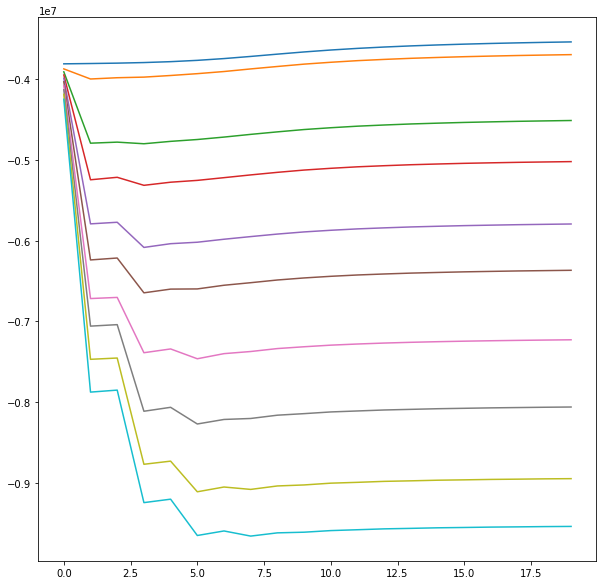

In [63]:
plt.figure(figsize=(10, 10))
for tau in [1e7, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8]:
    with open('20news_experiment/20news_10t_{}_True.pkl'.format(int(tau)), 'r') as f:
        data = pickle.load(f)
    L = (- np.log(data['train_perplexity']) * WORDS_NUMBER).mean(axis=0)
    R = (- np.array(data['topic_correlation']) * tau).mean(axis=0)
    print L[20], R[20], (L + R)[20]
    plt.plot(range(20), (L + R)[:20])

-3531447.814987197 -4892.77858530492 -3536340.593572502
-3671606.2318600905 -19732.250375071526 -3691338.482235162
-4426258.487477834 -22242.66206802547 -4448501.14954586
-4785353.970610661 -22863.87940264357 -4808217.850013305
-5365527.088661565 -22660.228654857092 -5388187.317316422
-5826902.519204104 -21452.308823896958 -5848354.828028001
-6354655.964774558 -20318.74848793049 -6374974.713262489
-6963358.734276909 -19190.73631682378 -6982549.470593733
-7568582.272192504 -18036.386002771273 -7586618.658195276
-8242443.046675836 -16762.09331556412 -8259205.1399914


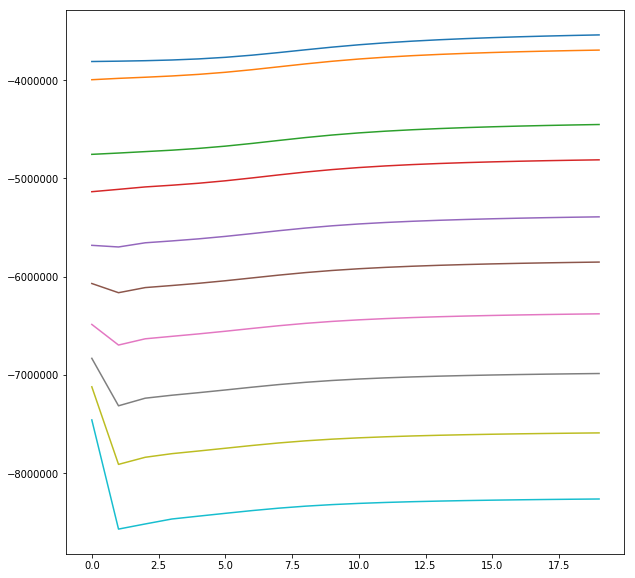

In [62]:
plt.figure(figsize=(10, 10))
for tau in [1e7, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8]:
    with open('20news_experiment/20news_10t_{}_False.pkl'.format(int(tau)), 'r') as f:
        data = pickle.load(f)
    L = (- np.log(data['train_perplexity']) * WORDS_NUMBER).mean(axis=0)
    R = (- np.array(data['topic_correlation']) * tau).mean(axis=0)
    print L[20], R[20], (L + R)[20]
    plt.plot(range(20), (L + R)[:20])

In [110]:
def format_degree(value):
    k = 0
    value = float(value)
    while value >= 10:
        value /= 10
        k += 1
    value = round(value, 2)
    if value == int(value):
        value = int(value)
    if value != 1:
        return '{} \\cdot 10^{}'.format(value, k)
    else:
        return '10^{}'.format(k)

In [111]:
format_degree(1e7)

'10^7'

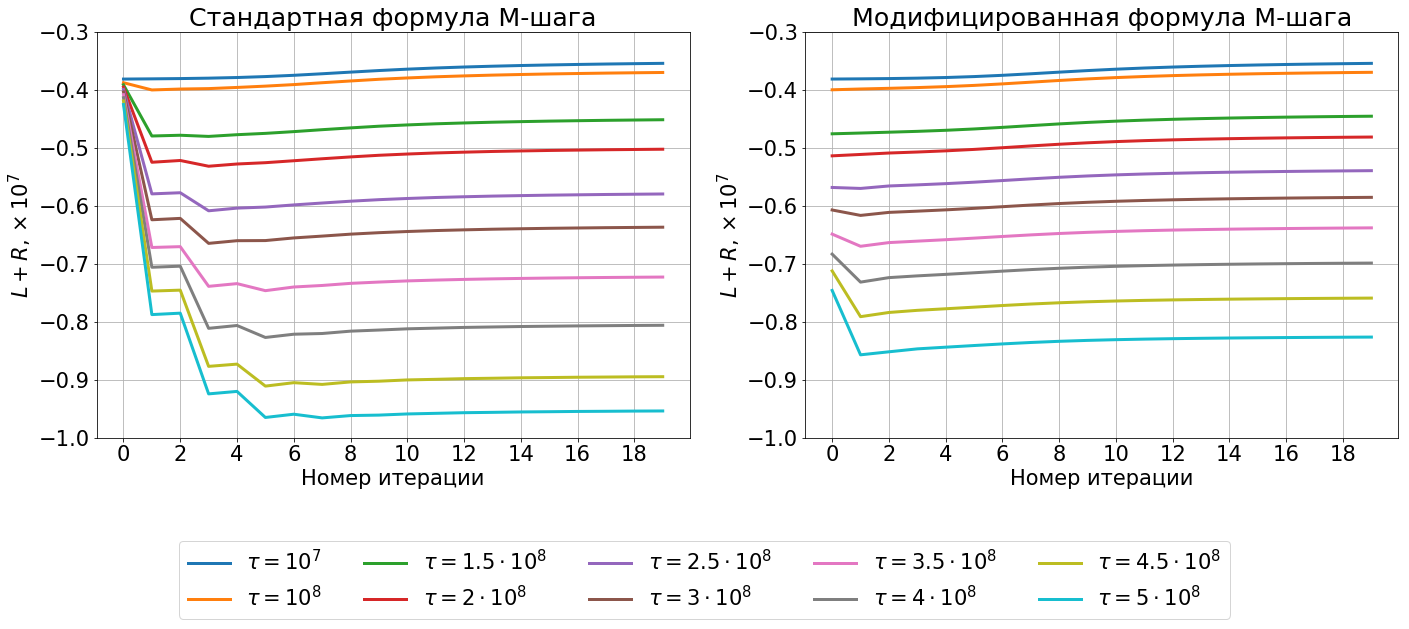

In [165]:
font = {
    'family' : 'sans-serif',
    'size'   : 21,
    'sans-serif': ['Roboto']
}
plt.rc('font', **font)

fig = plt.figure(figsize=(20, 9))
x_ticks = np.arange(0, 21, 2)
taus = map(int, [1e7, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8])

ax = fig.add_subplot(121)
ax.set_xticks(x_ticks)
old_values = []
for tau in taus:
    with open('20news_experiment/20news_10t_{}_True.pkl'.format(tau), 'r') as f:
        data = pickle.load(f)
    L = (- np.log(data['train_perplexity']) * WORDS_NUMBER).mean(axis=0)
    R = (- np.array(data['topic_correlation']) * tau).mean(axis=0)
    old_values.append((1 * L + 1 * R)[20])
    plt.plot(range(20), (L + R)[:20] / 1e7, linewidth=3)
plt.xlabel(u'Номер итерации')
plt.ylabel('$L + R, \\times 10^7$')
plt.ylim(-1, -0.3)
plt.title(u'Стандартная формула M-шага')
plt.grid()

    
ax = fig.add_subplot(122)
ax.set_xticks(x_ticks)
new_values = []
for tau in taus:
    with open('20news_experiment/20news_10t_{}_False.pkl'.format(tau), 'r') as f:
        data = pickle.load(f)
    L = (- np.log(data['train_perplexity']) * WORDS_NUMBER).mean(axis=0)
    R = (- np.array(data['topic_correlation']) * tau).mean(axis=0)
    new_values.append((1 * L + 1 * R)[20])
    plt.plot(range(20), (L + R)[:20] / 1e7, linewidth=3)
plt.xlabel(u'Номер итерации')
plt.ylabel('$L + R, \\times 10^7$')
plt.ylim(-1, -0.3)
plt.title(u'Модифицированная формула M-шага')
plt.grid()


plt.tight_layout()
plt.subplots_adjust(bottom=.3)
plt.figlegend(
    labels=map(lambda x: '$\\tau = {}$'.format(format_degree(x)), taus), 
    loc='lower center', 
    ncol=len(taus) / 2
)

plt.savefig('./paper.eps', format="eps")
plt.show()

In [143]:
for tau, old, new in zip(taus, old_values, new_values):
    print ' & '.join(map(str, ['$' + format_degree(tau) + '$', int(old), int(new), round((new - old) / abs(old) * 100, 2)])) + ' \\\\ \\hline'
    


$10^7$ & -3536050 & -3536340 & -0.01 \\ \hline
$10^8$ & -3693905 & -3691338 & 0.07 \\ \hline
$1.5 \cdot 10^8$ & -4509247 & -4448501 & 1.35 \\ \hline
$2 \cdot 10^8$ & -5018335 & -4808217 & 4.19 \\ \hline
$2.5 \cdot 10^8$ & -5790283 & -5388187 & 6.94 \\ \hline
$3 \cdot 10^8$ & -6363392 & -5848354 & 8.09 \\ \hline
$3.5 \cdot 10^8$ & -7223361 & -6374974 & 11.75 \\ \hline
$4 \cdot 10^8$ & -8055262 & -6982549 & 13.32 \\ \hline
$4.5 \cdot 10^8$ & -8941616 & -7586618 & 15.15 \\ \hline
$5 \cdot 10^8$ & -9532948 & -8259205 & 13.36 \\ \hline


In [32]:
data.keys()

['phi_sparsity',
 'test_perplexity',
 'kernel_avg_size',
 'top_50_avg_jaccard',
 'train_perplexity',
 'theta_sparsity',
 'topic_correlation',
 'top_200_avg_jaccard',
 'kernel_avg_jaccard',
 'top_100_avg_jaccard',
 'top_[5,10,20,30]_pmi',
 'top_10_avg_jaccard']

In [ ]:
np.log(data['train_perplexity']) * WORDS_NUMBER * (-1)

# T = 10

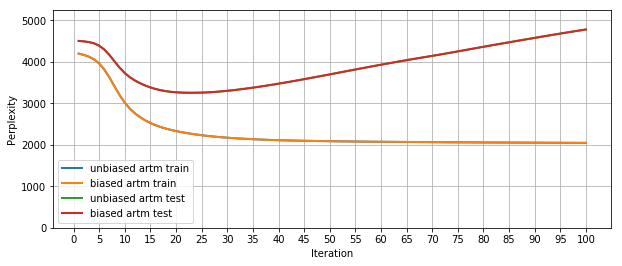

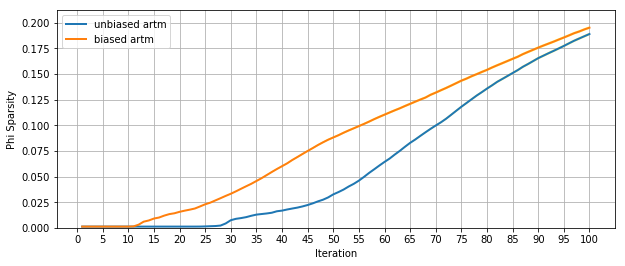

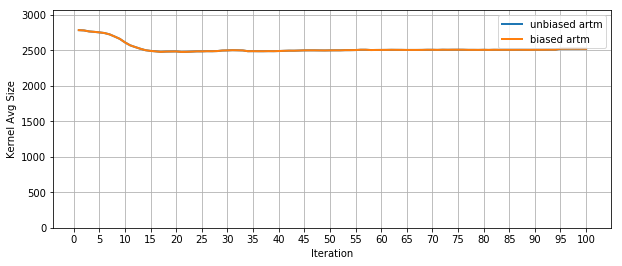

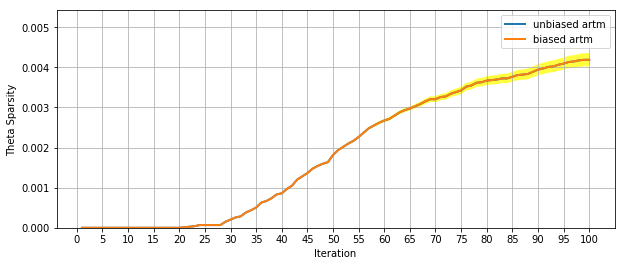

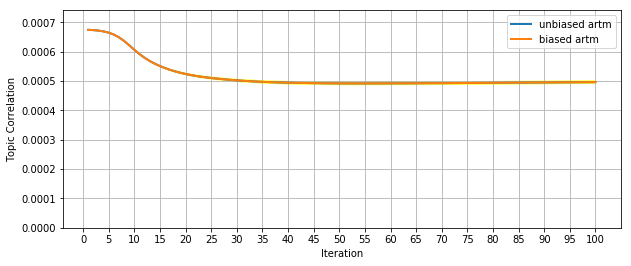

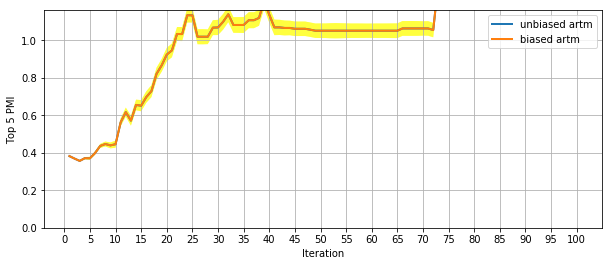

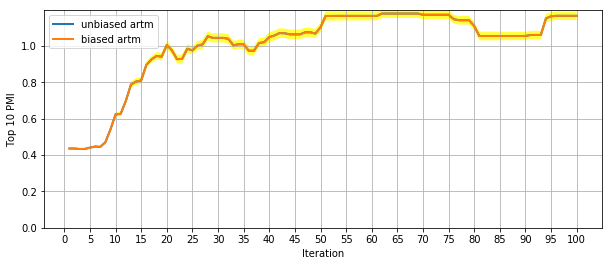

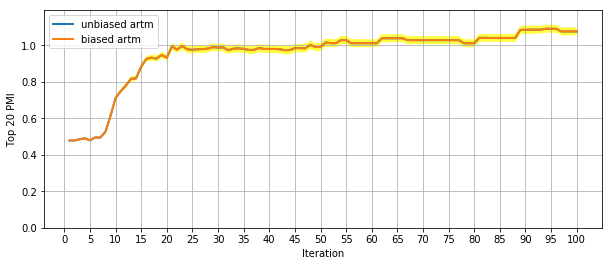

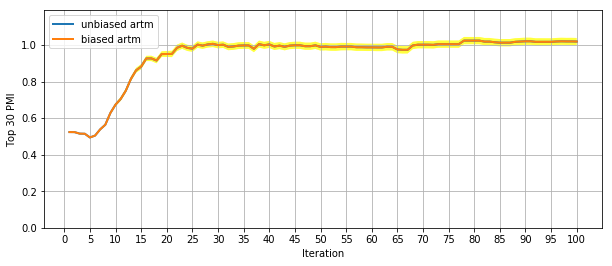

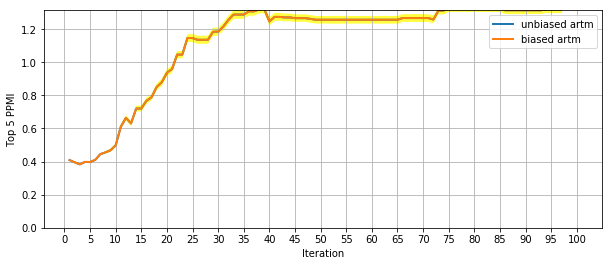

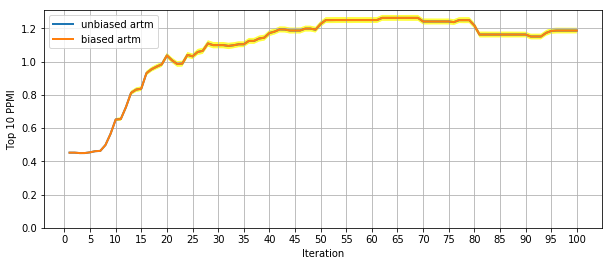

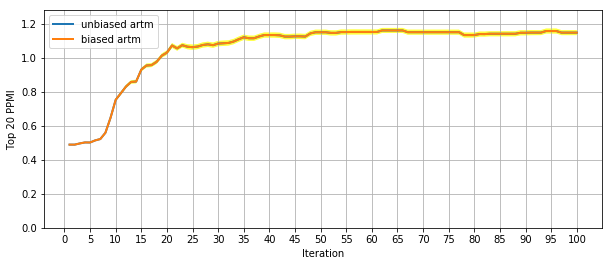

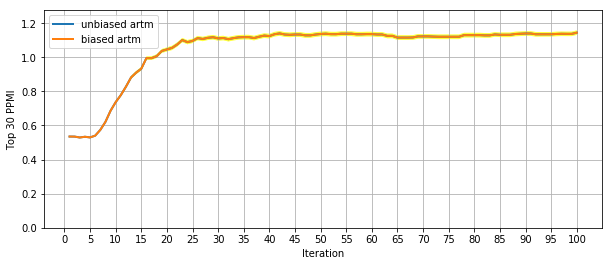

In [3]:
plot(10, 1000)

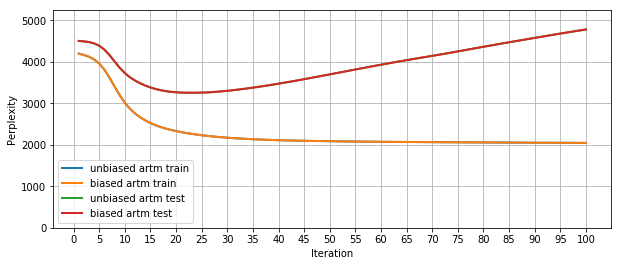

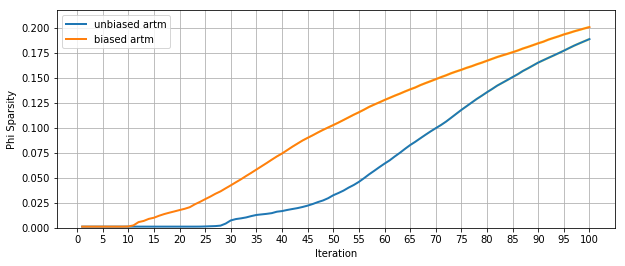

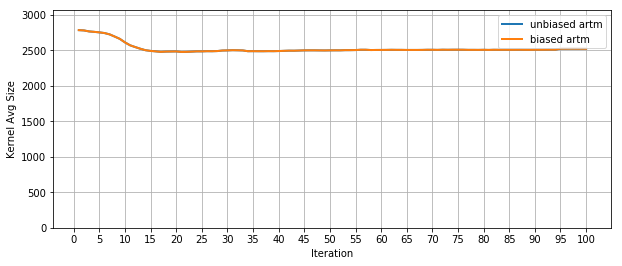

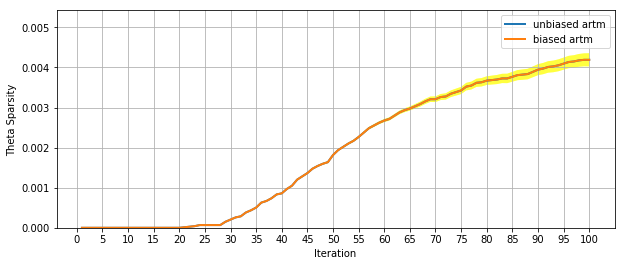

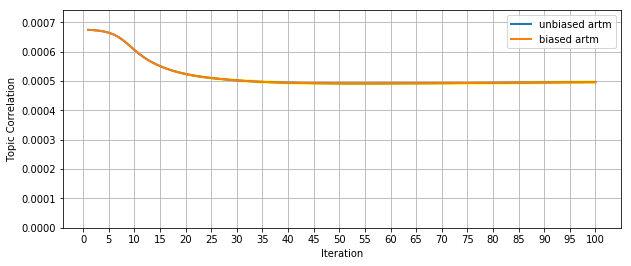

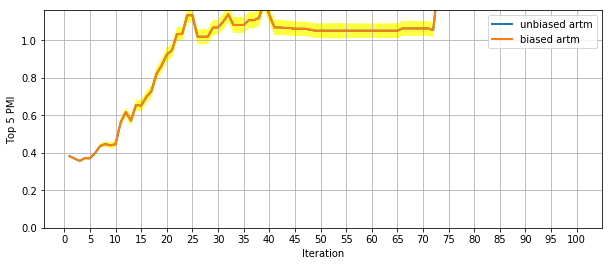

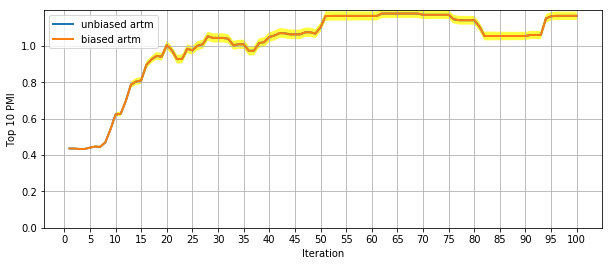

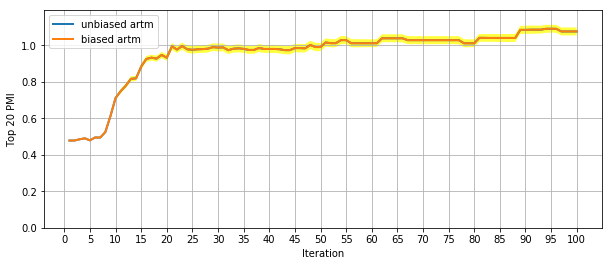

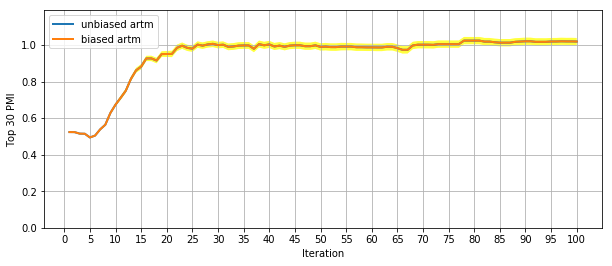

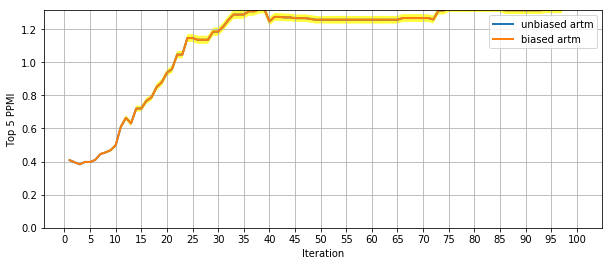

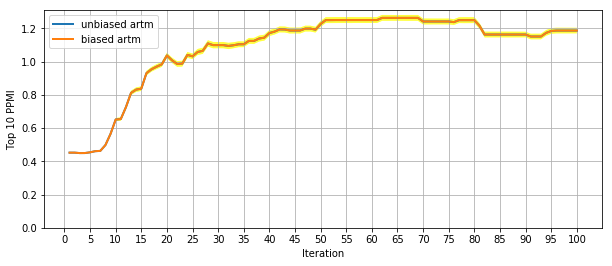

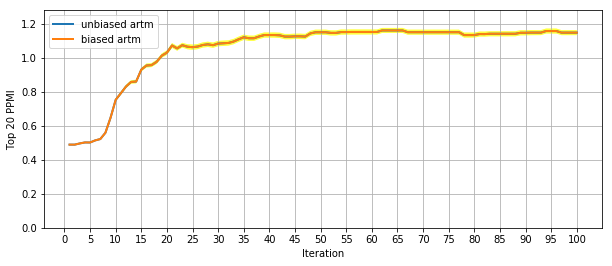

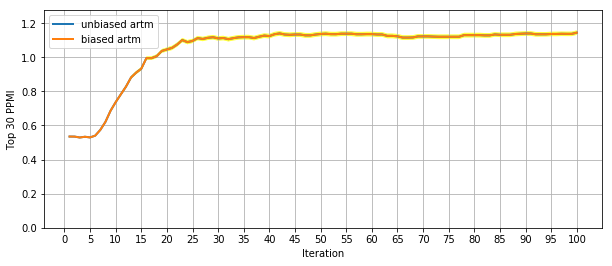

In [4]:
plot(10, 10000)

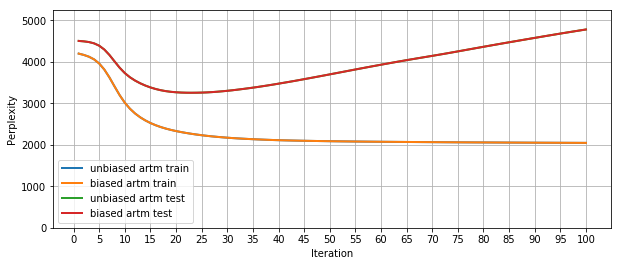

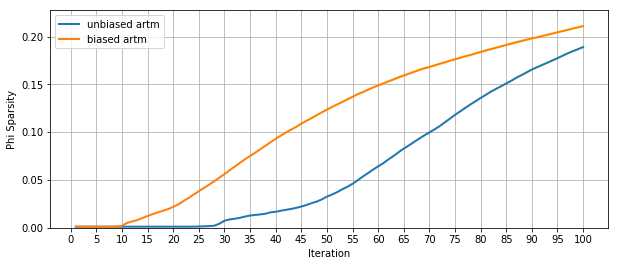

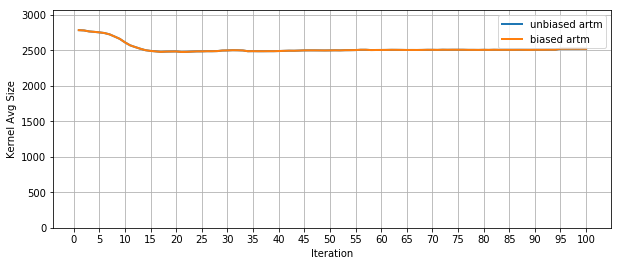

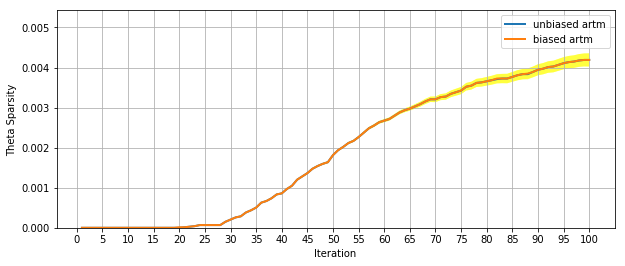

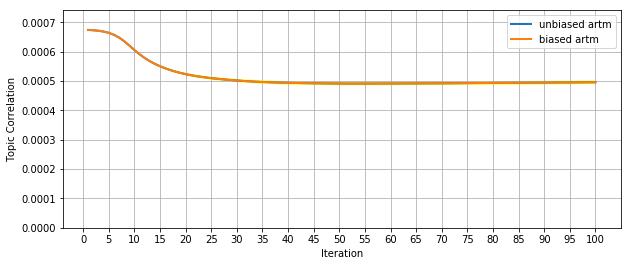

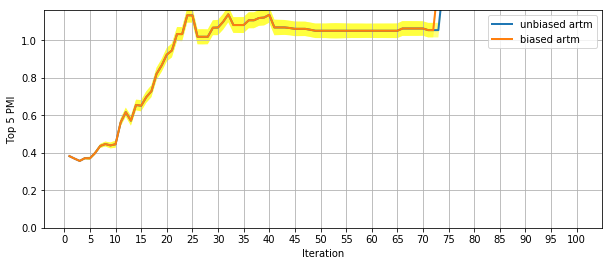

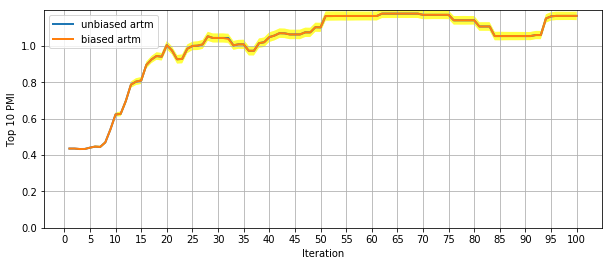

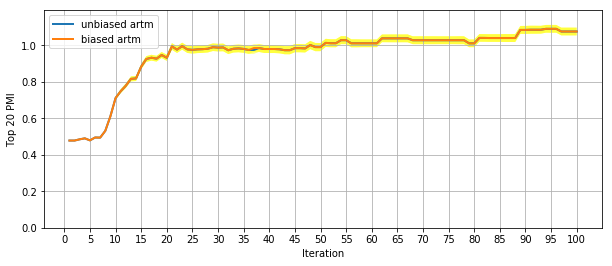

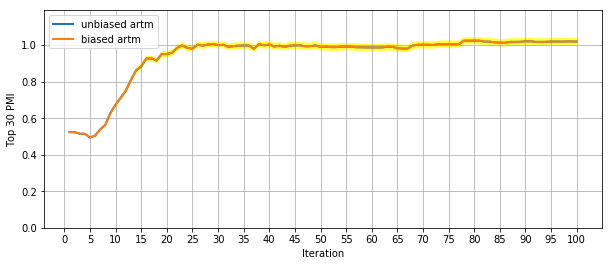

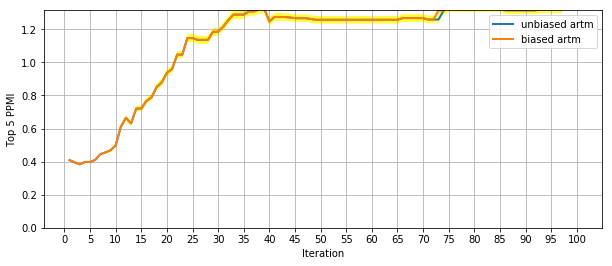

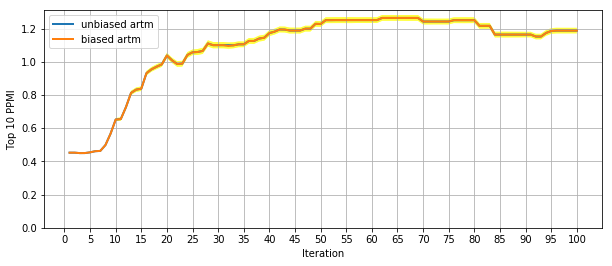

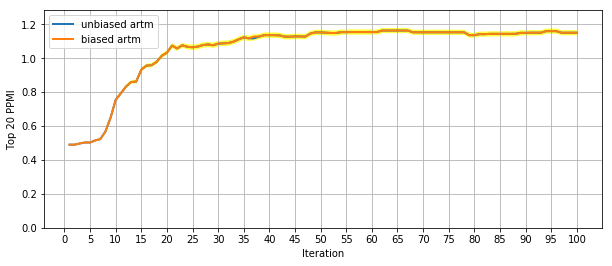

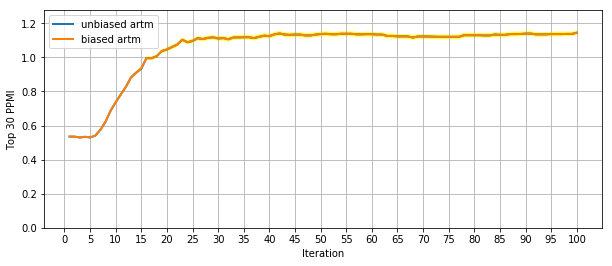

In [5]:
plot(10, 100000)

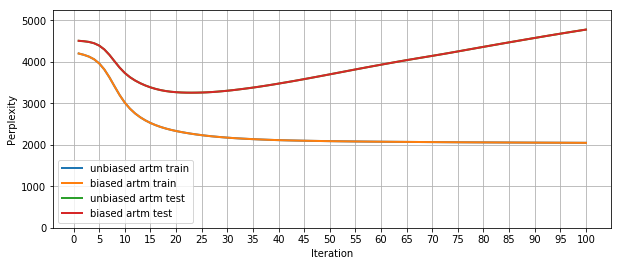

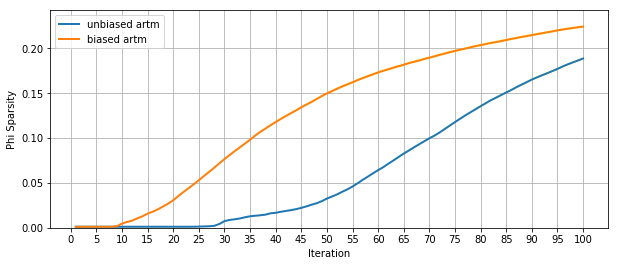

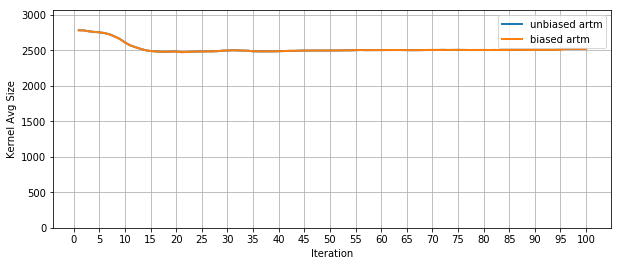

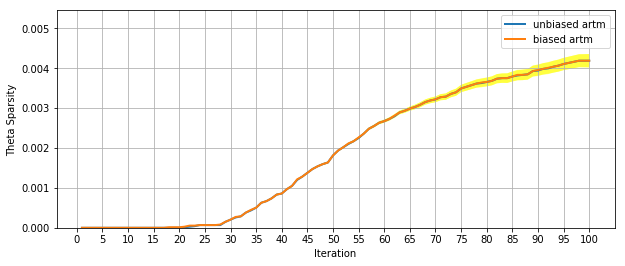

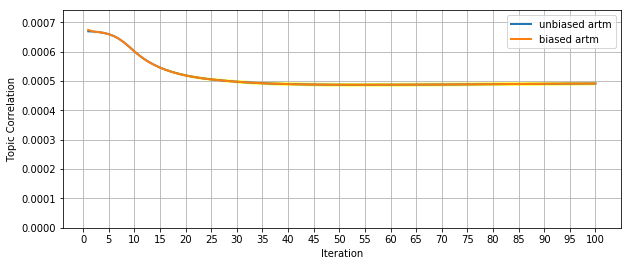

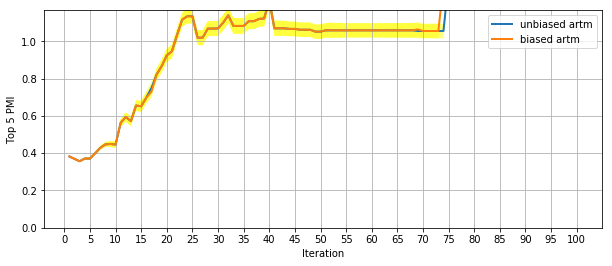

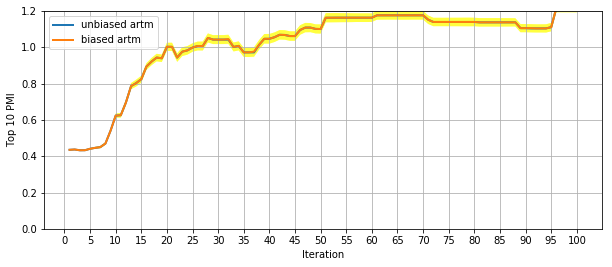

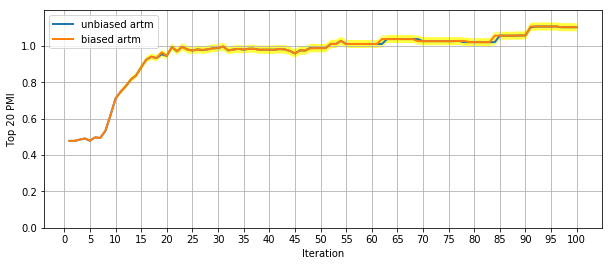

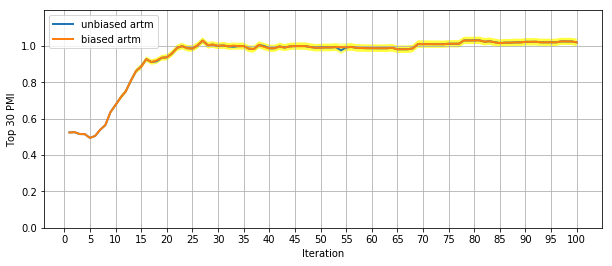

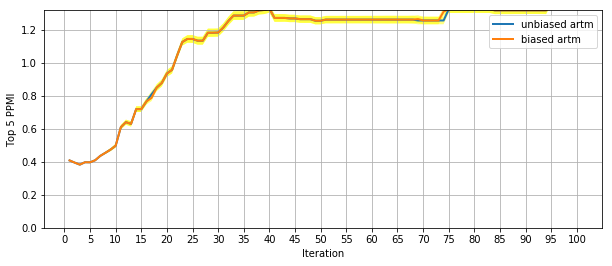

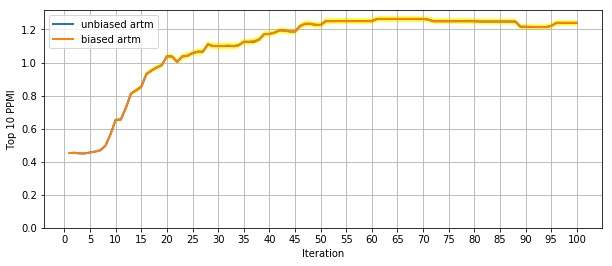

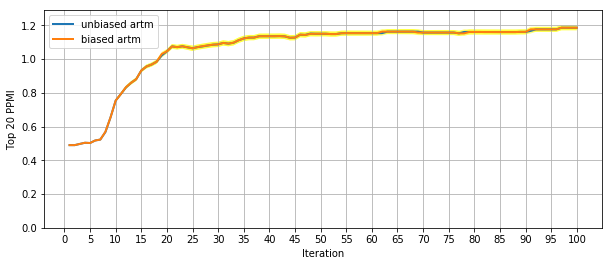

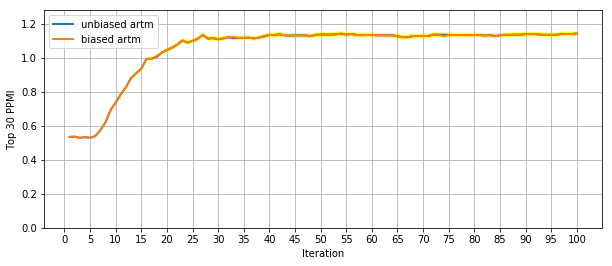

In [6]:
plot(10, 1000000)

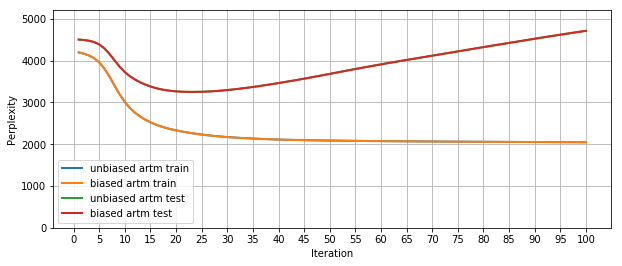

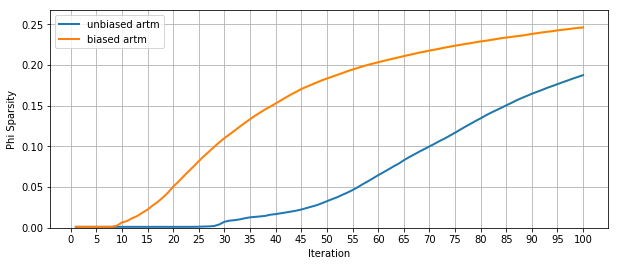

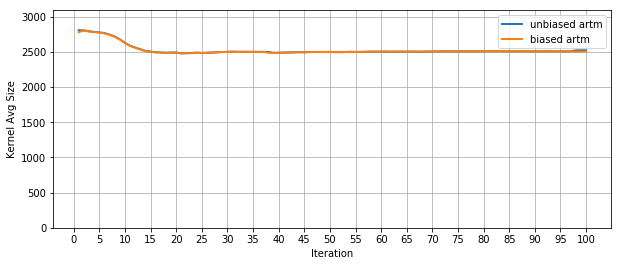

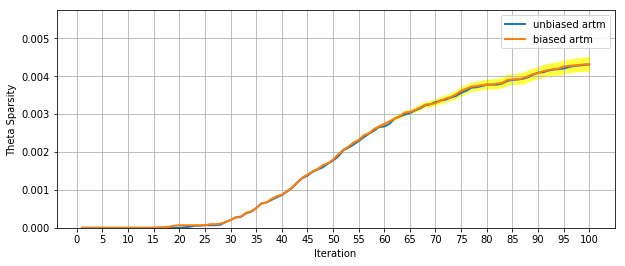

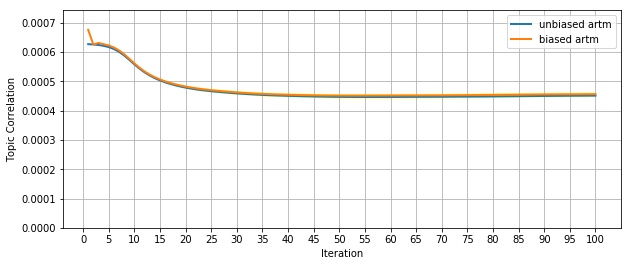

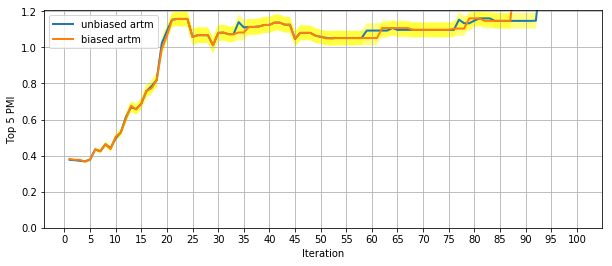

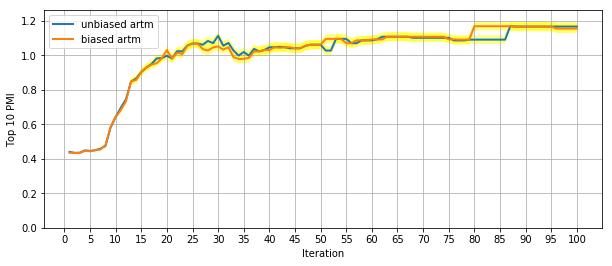

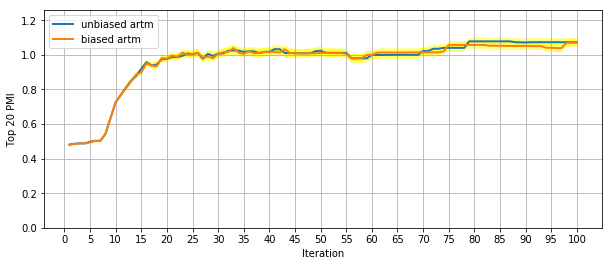

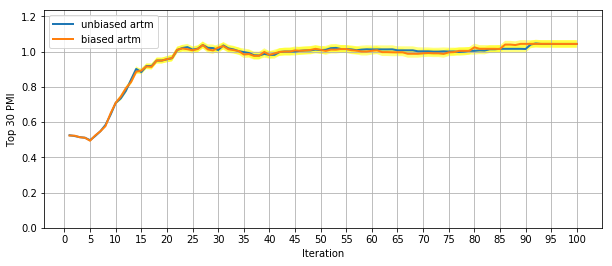

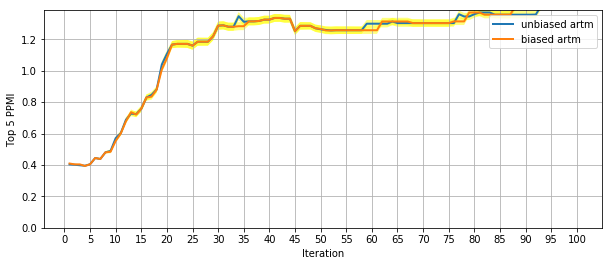

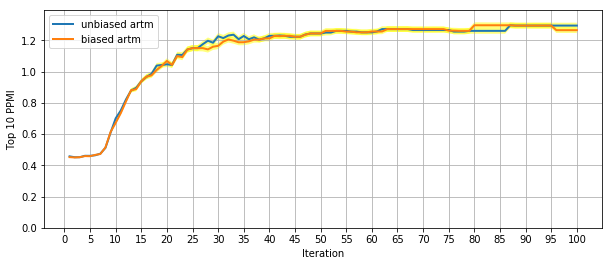

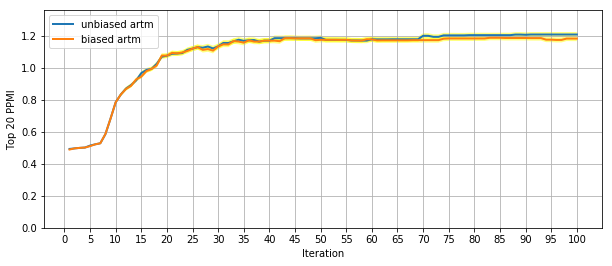

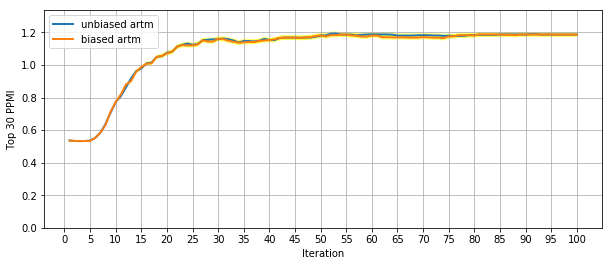

In [7]:
plot(10, 10000000)

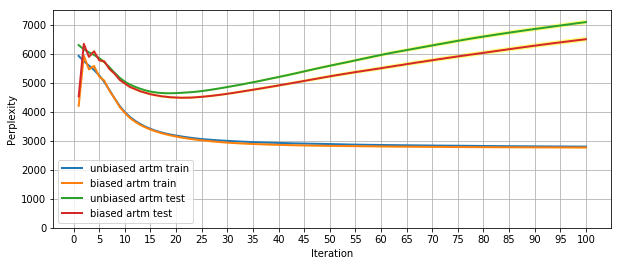

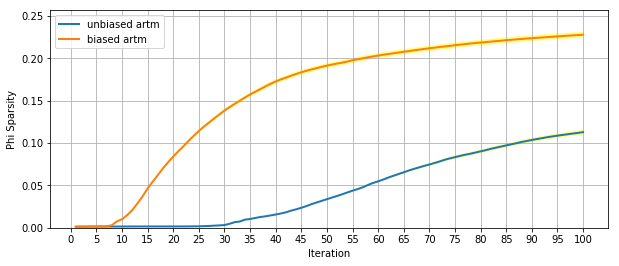

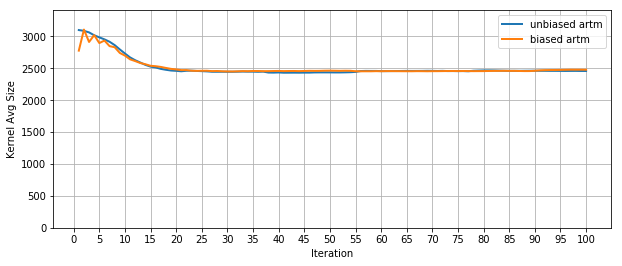

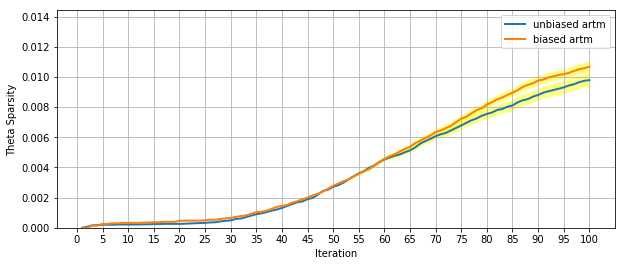

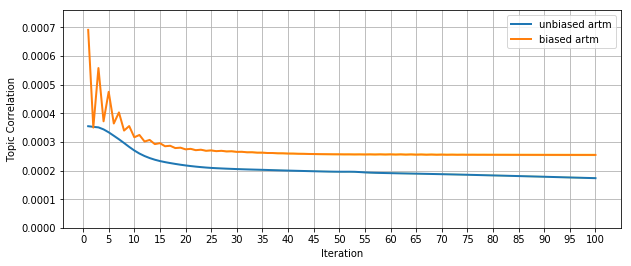

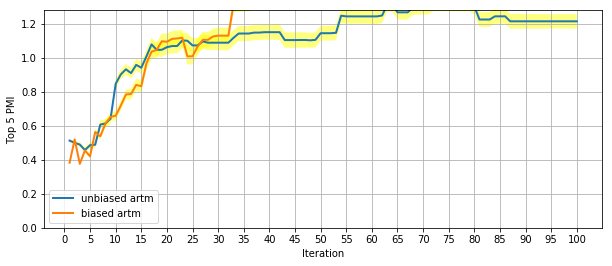

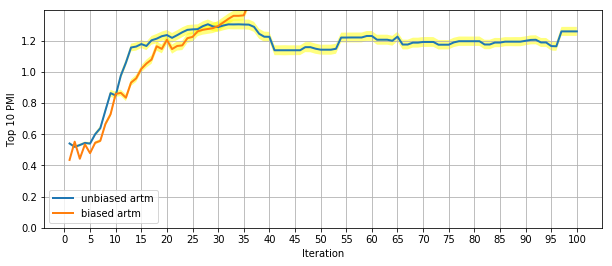

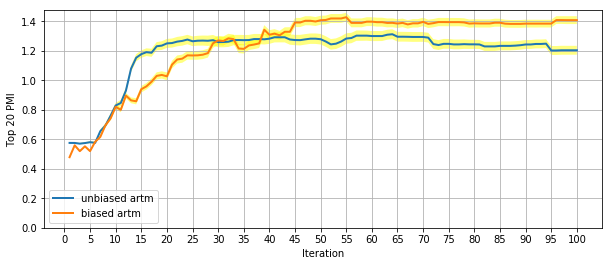

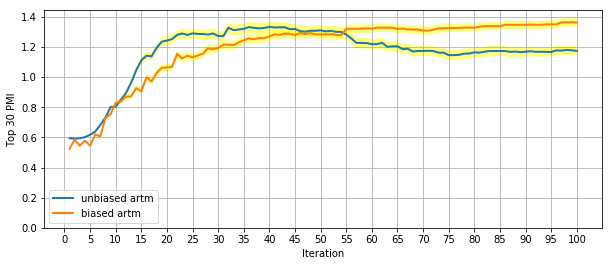

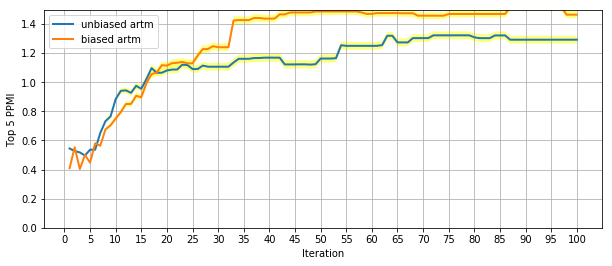

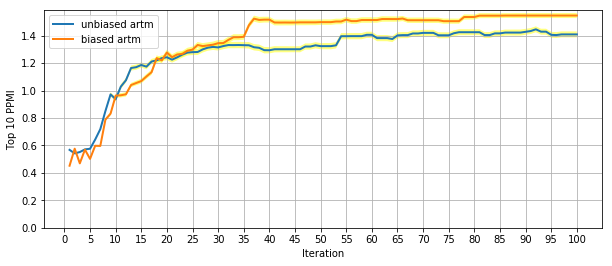

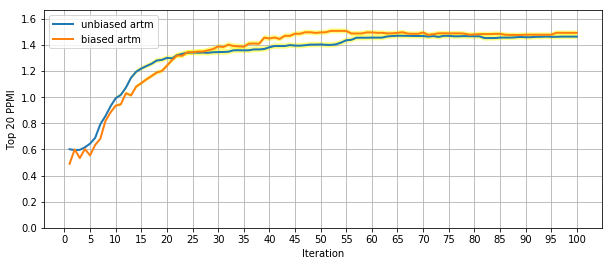

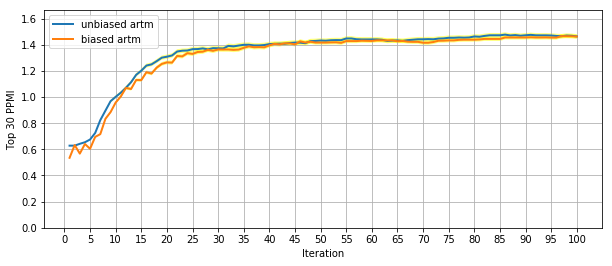

In [8]:
plot(10, 100000000)

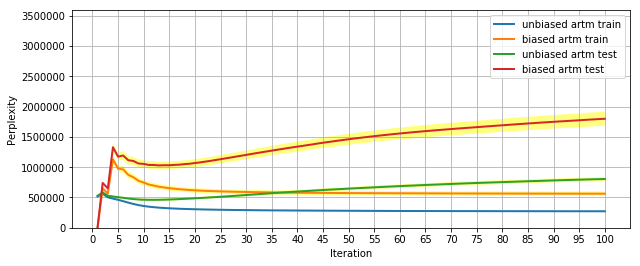

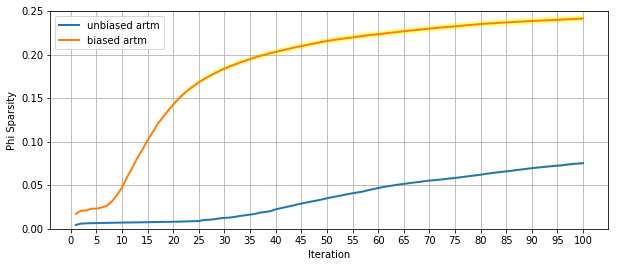

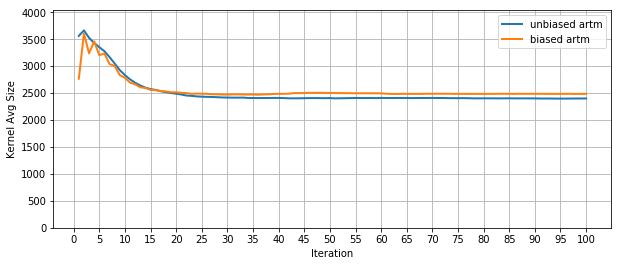

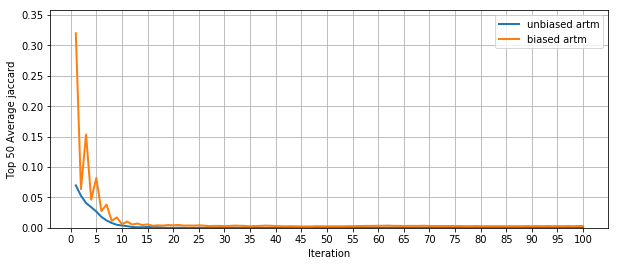

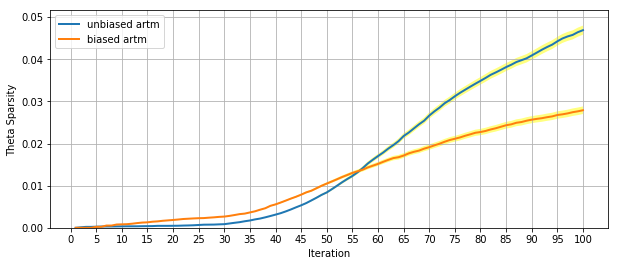

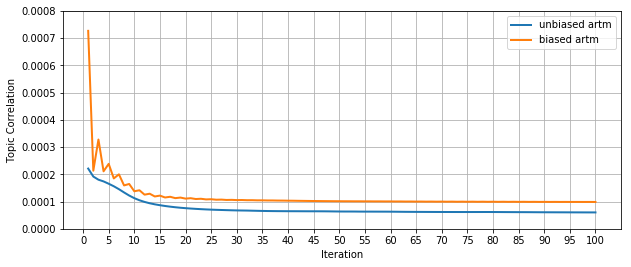

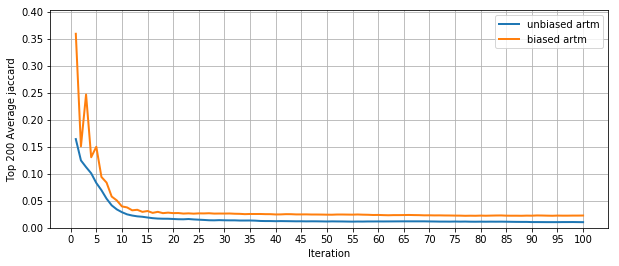

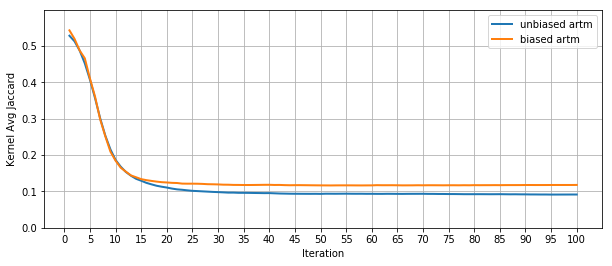

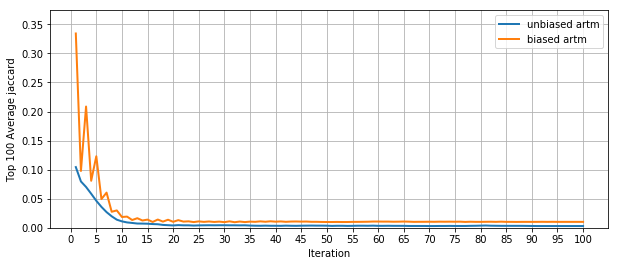

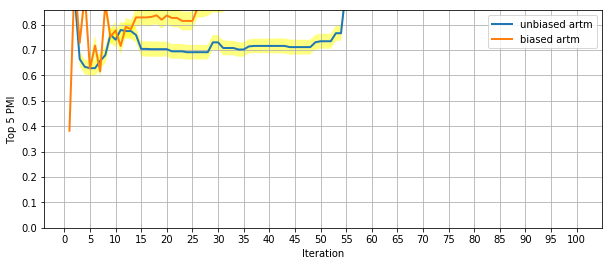

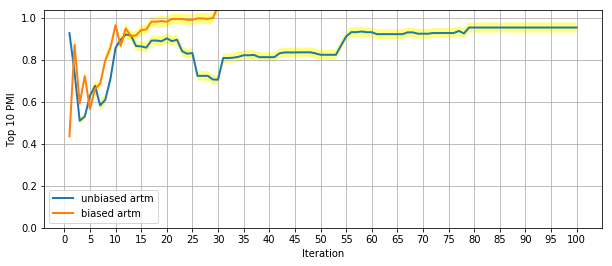

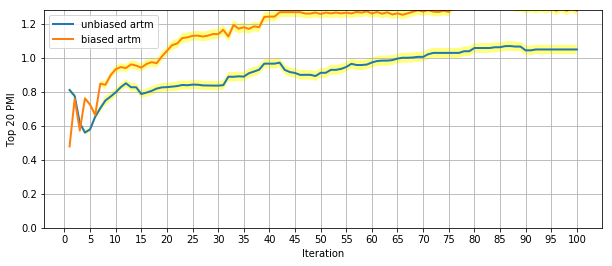

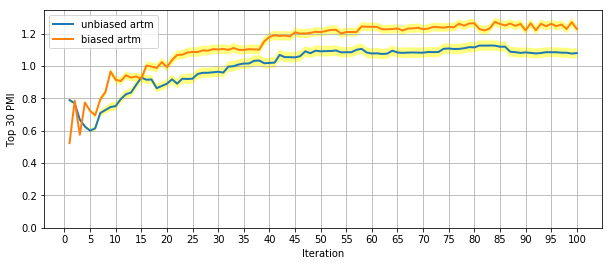

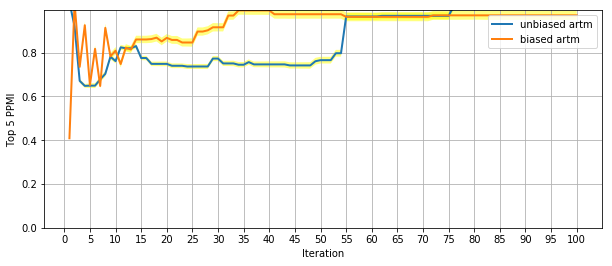

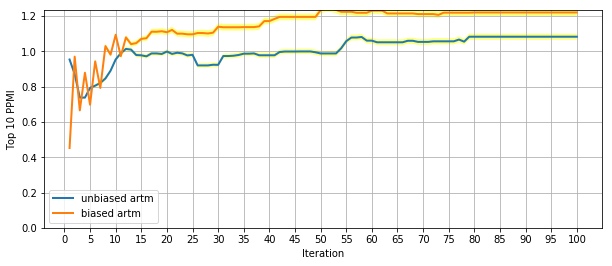

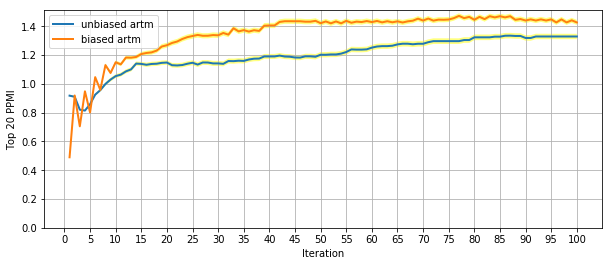

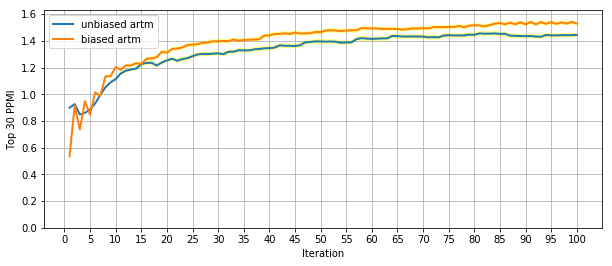

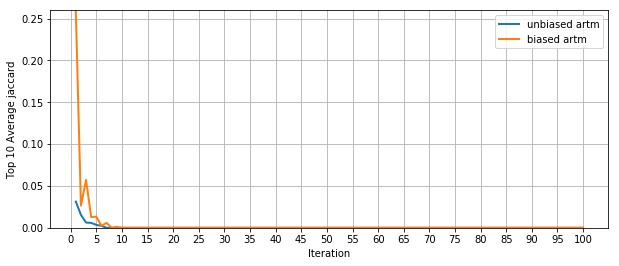

In [9]:
plot(10, 300000000)

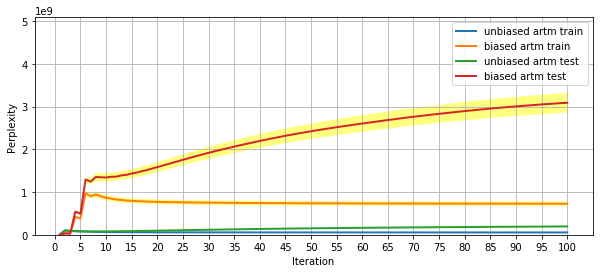

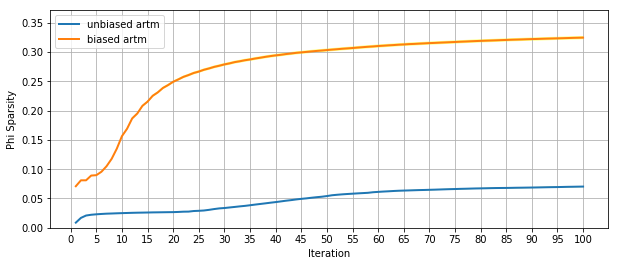

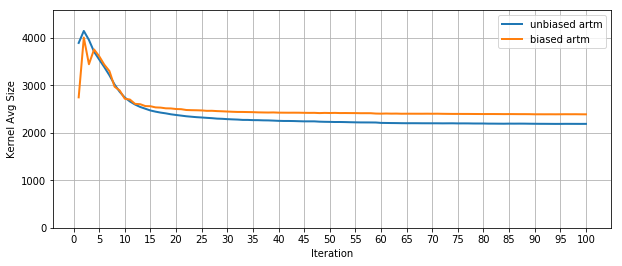

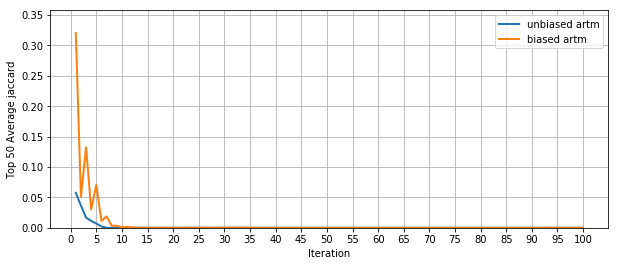

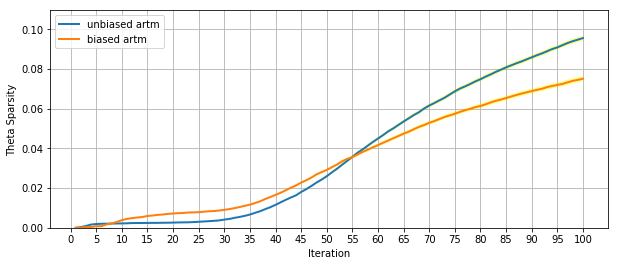

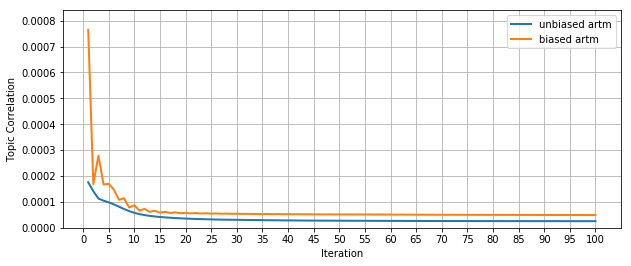

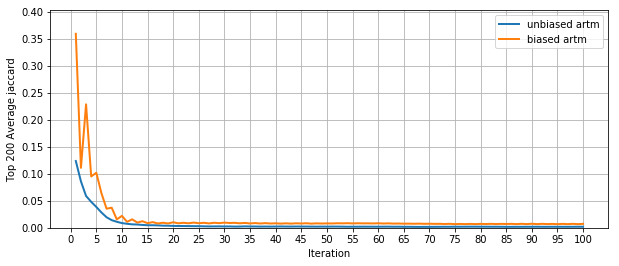

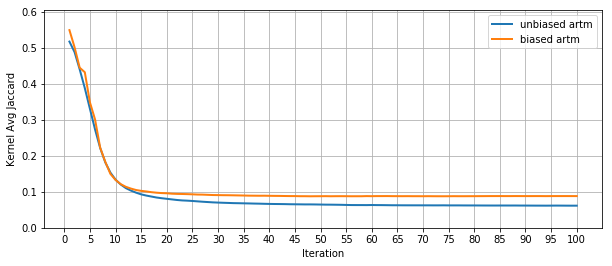

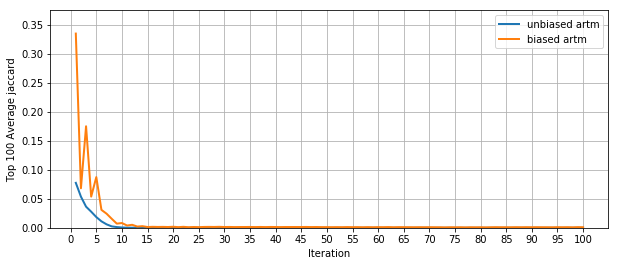

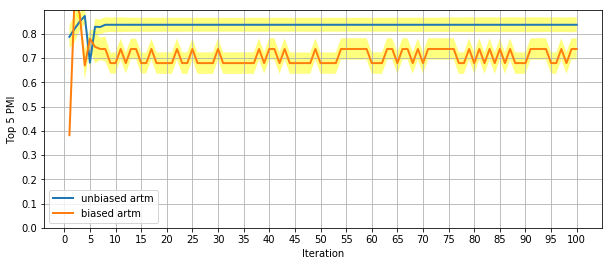

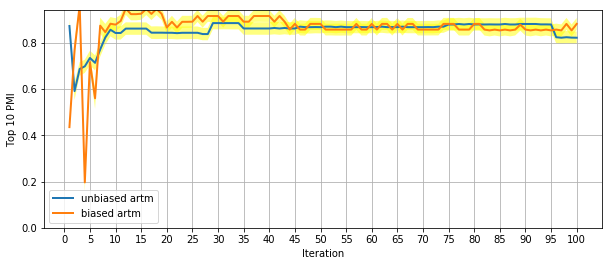

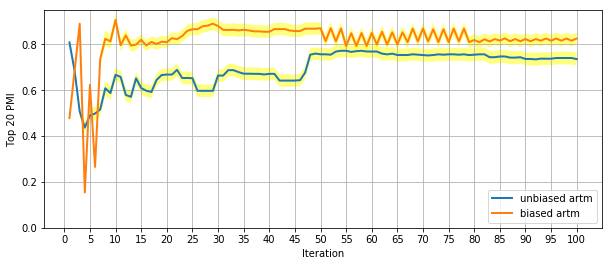

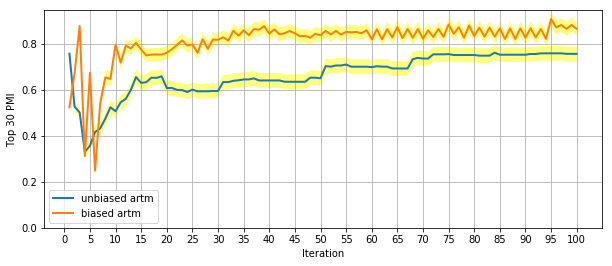

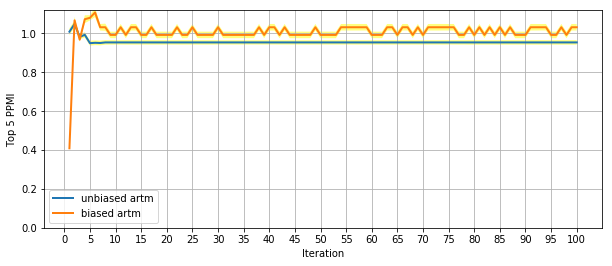

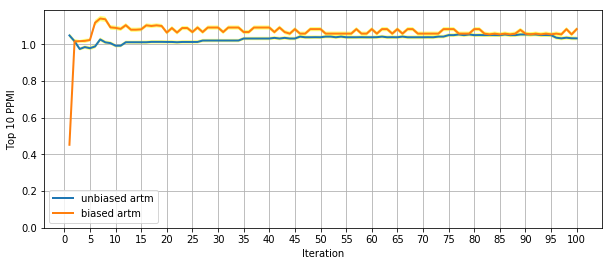

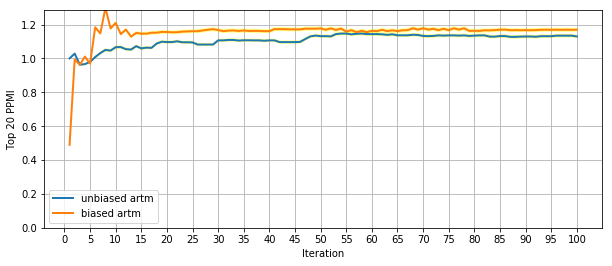

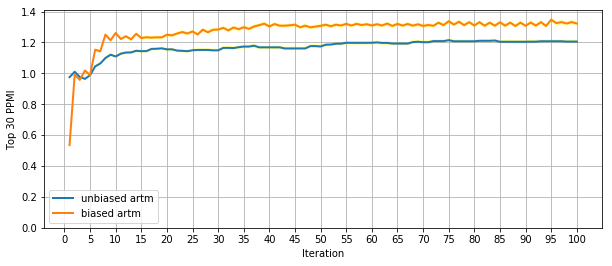

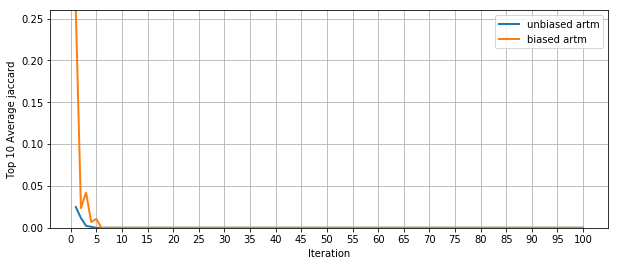

In [10]:
plot(10, 500000000)

# T = 30

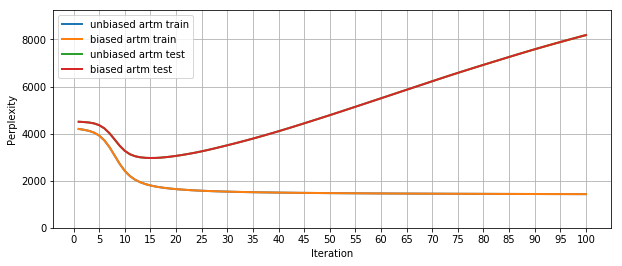

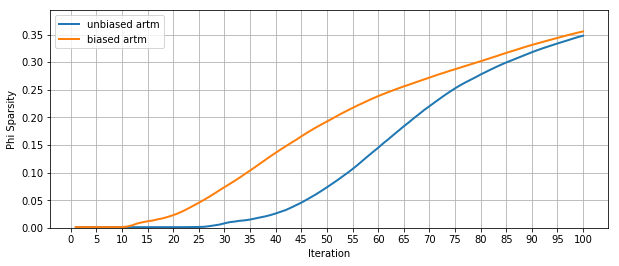

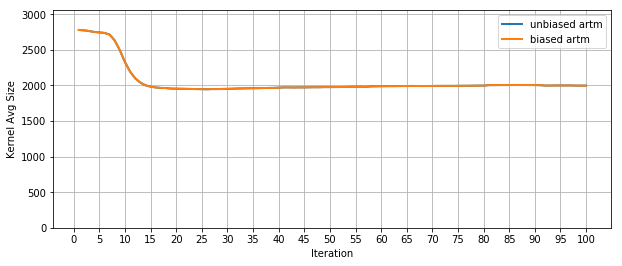

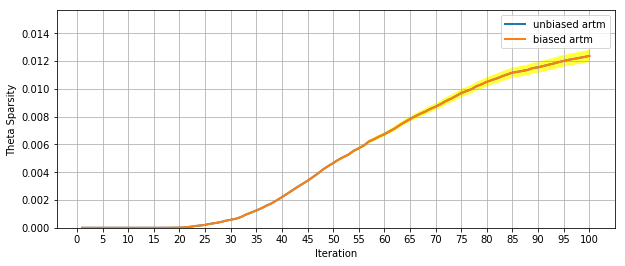

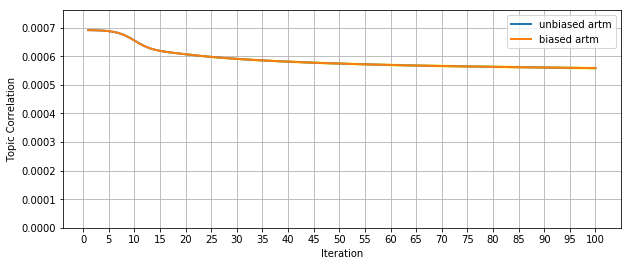

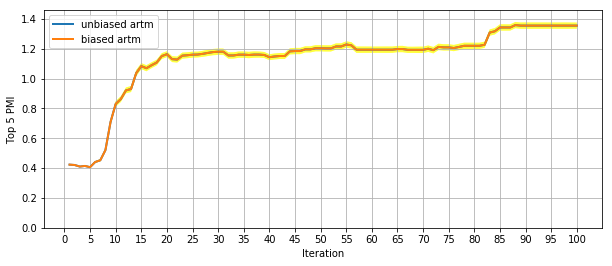

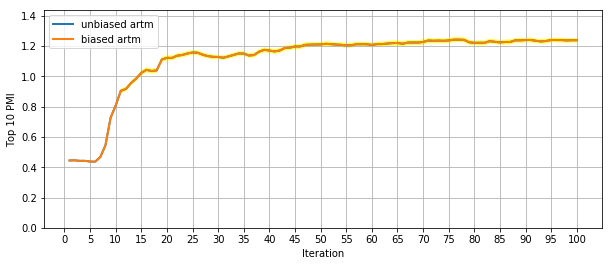

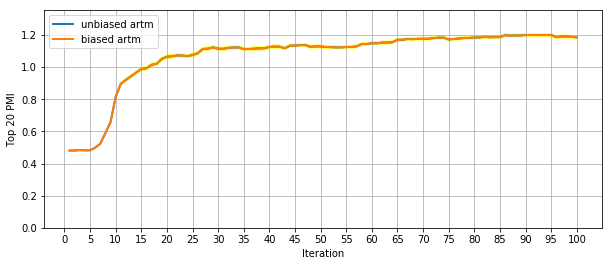

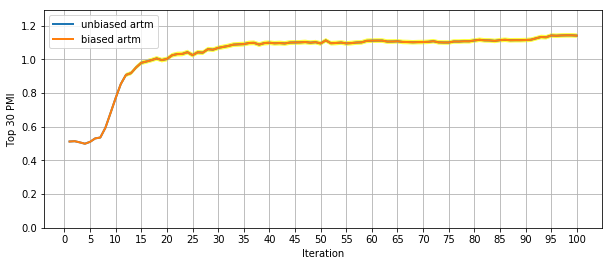

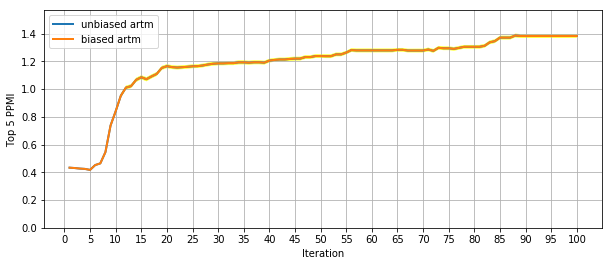

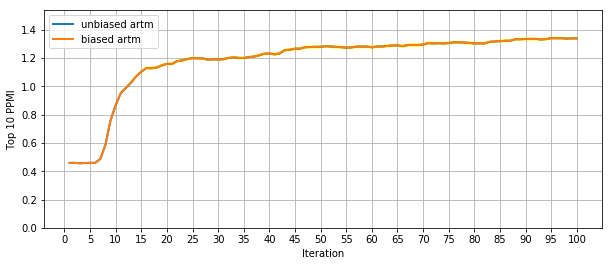

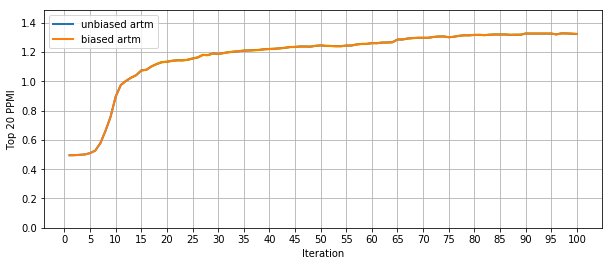

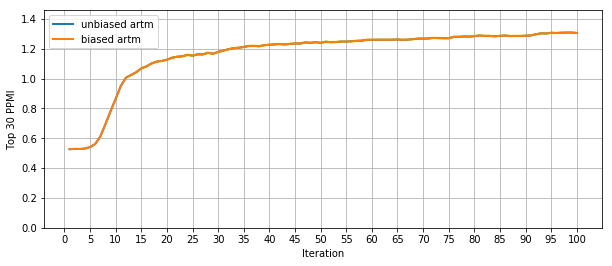

In [11]:
plot(30, 1000)

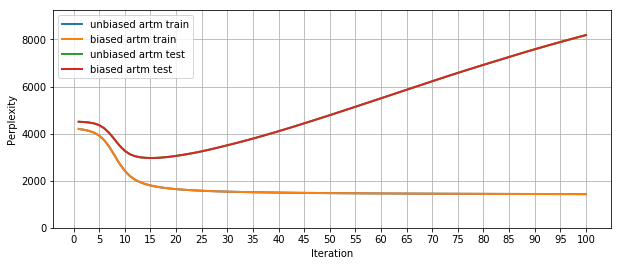

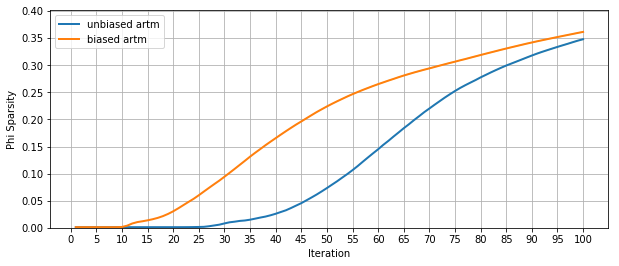

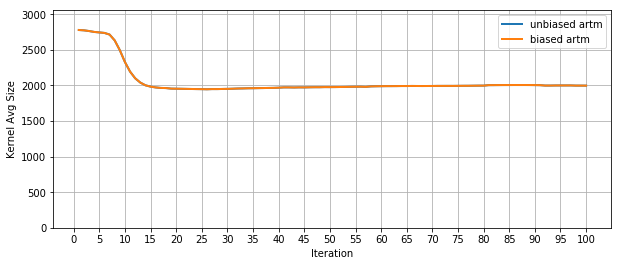

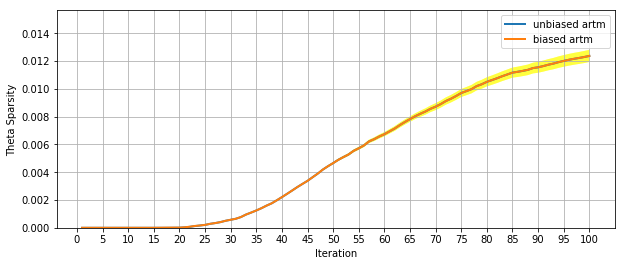

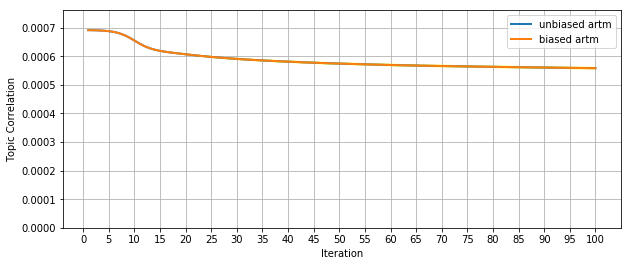

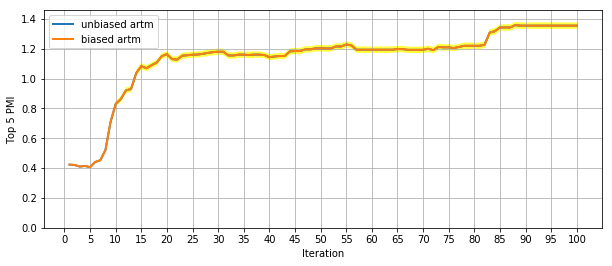

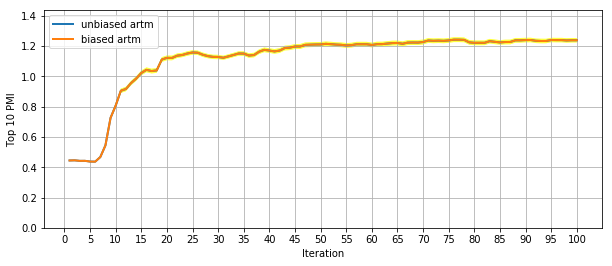

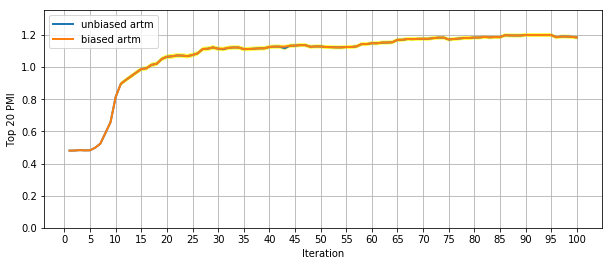

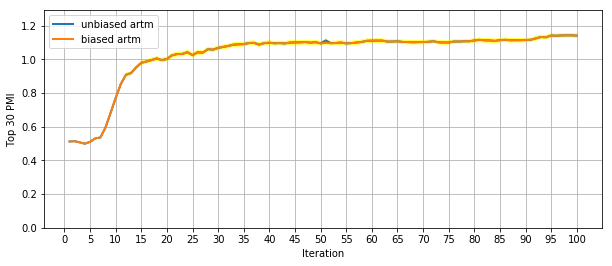

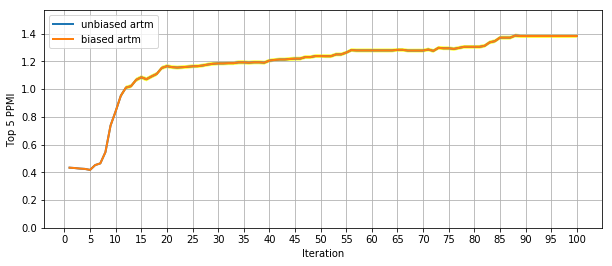

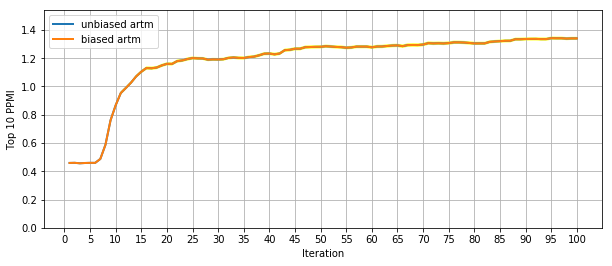

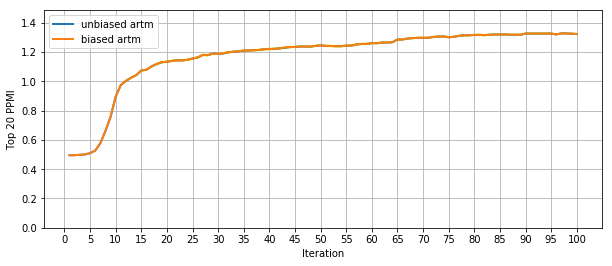

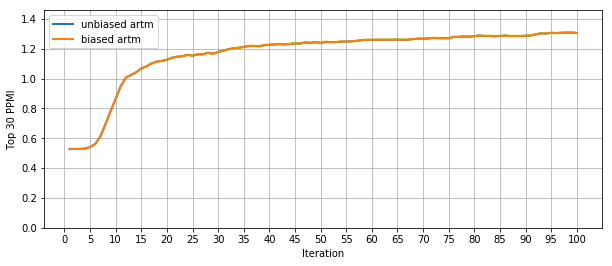

In [12]:
plot(30, 10000)

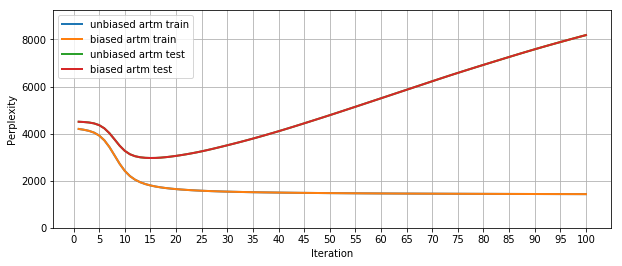

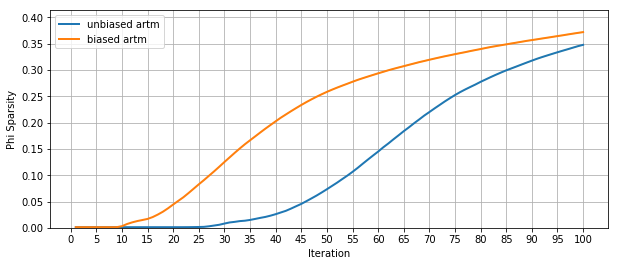

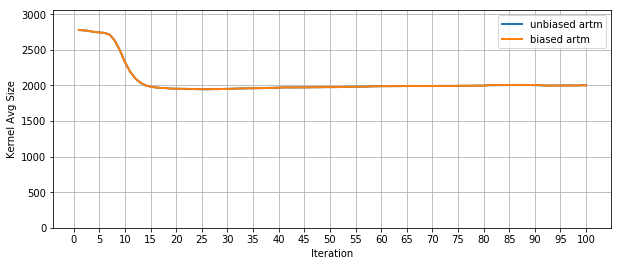

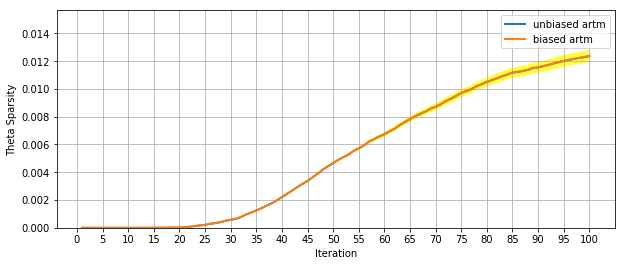

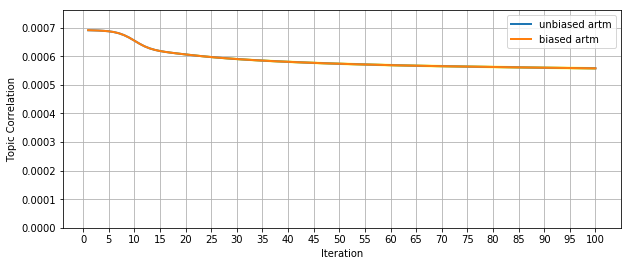

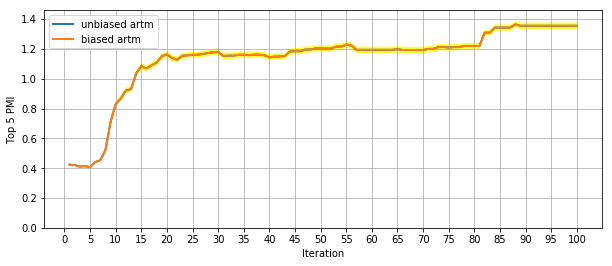

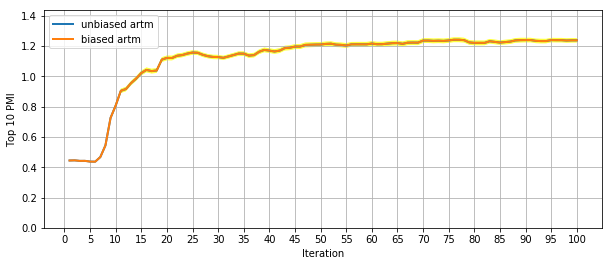

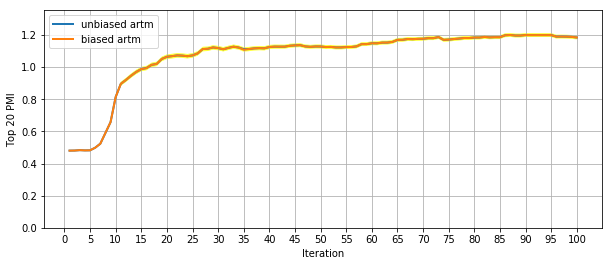

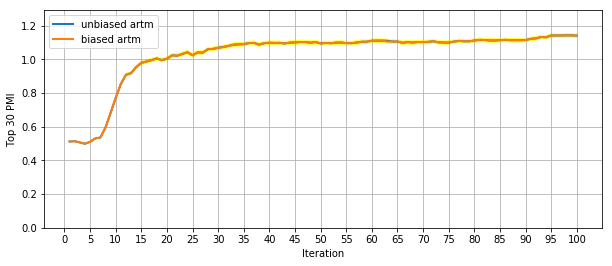

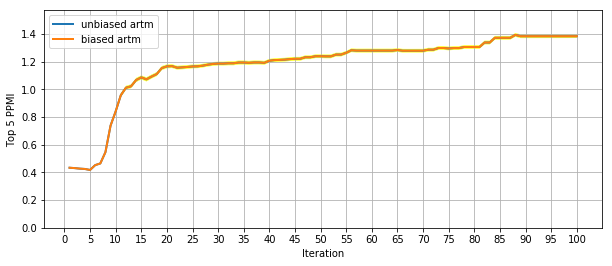

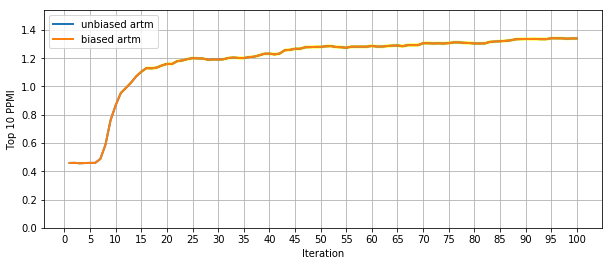

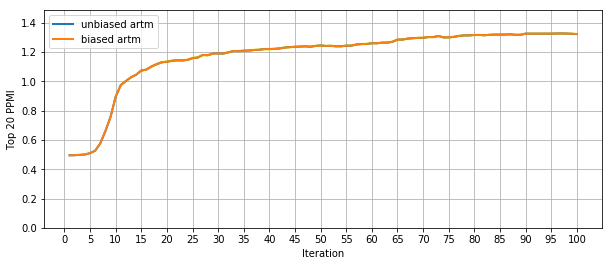

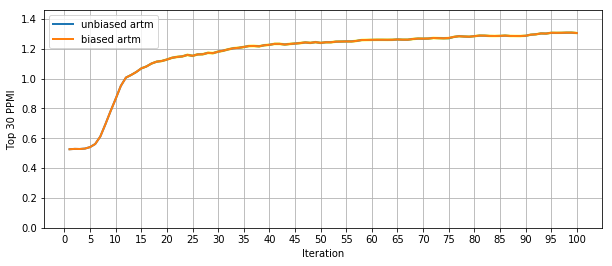

In [13]:
plot(30, 100000)

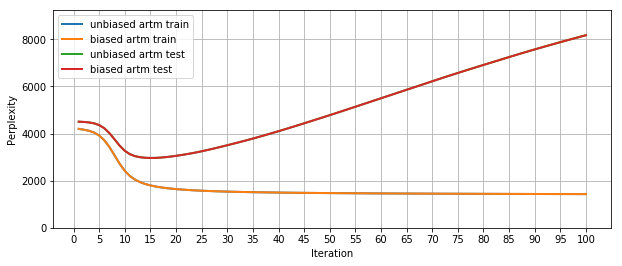

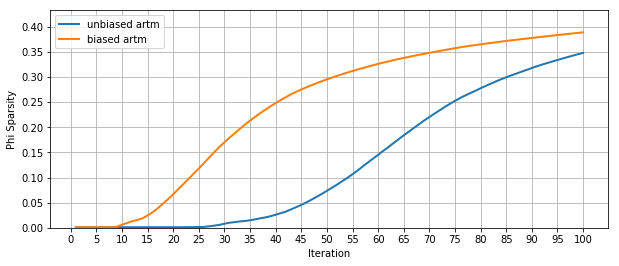

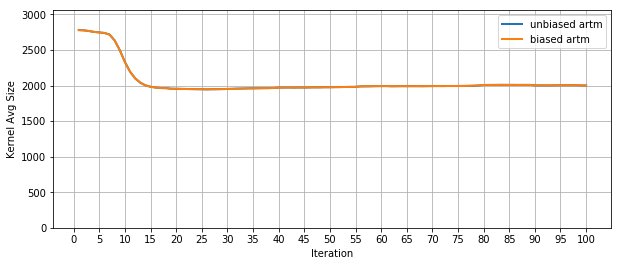

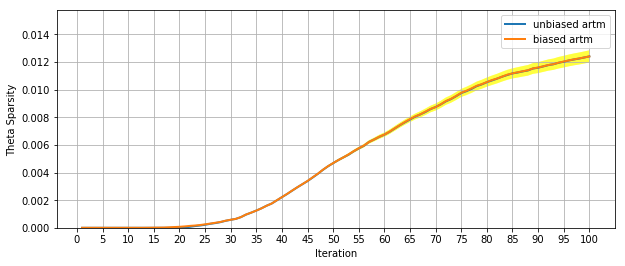

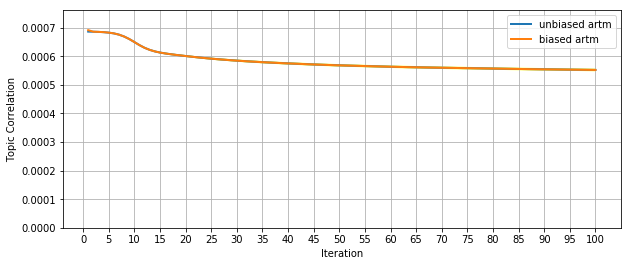

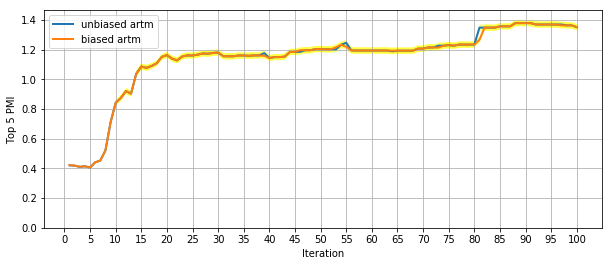

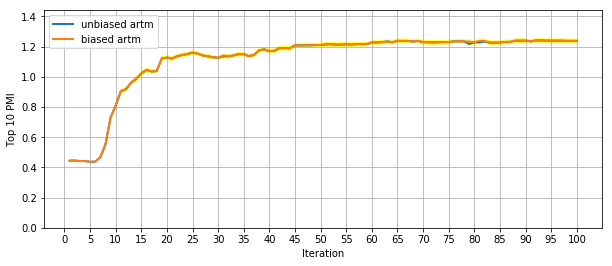

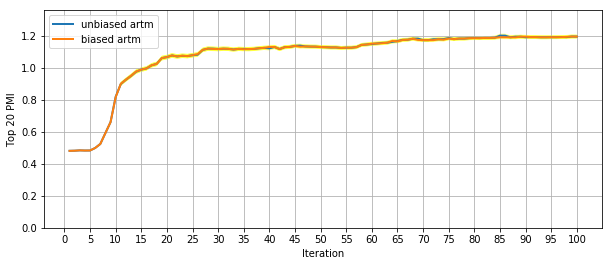

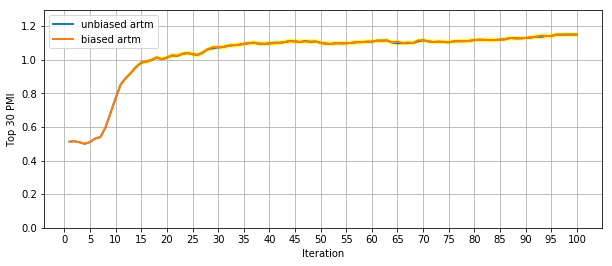

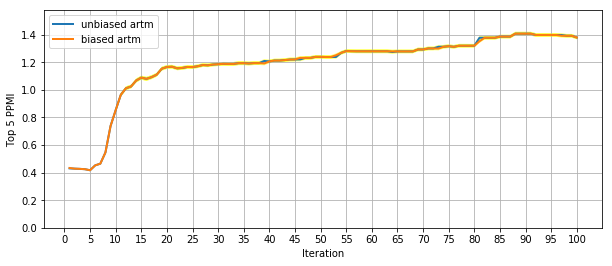

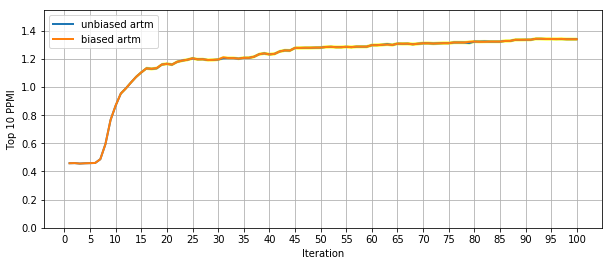

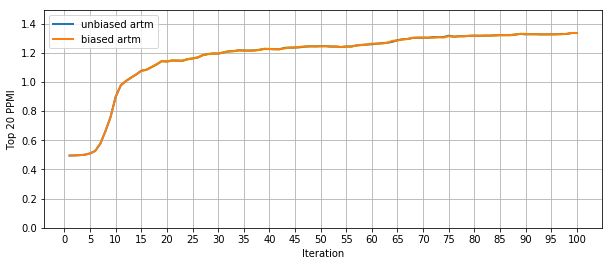

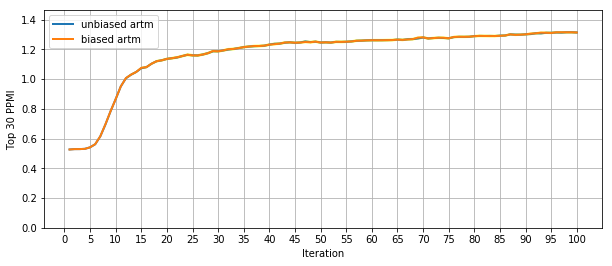

In [14]:
plot(30, 1000000)

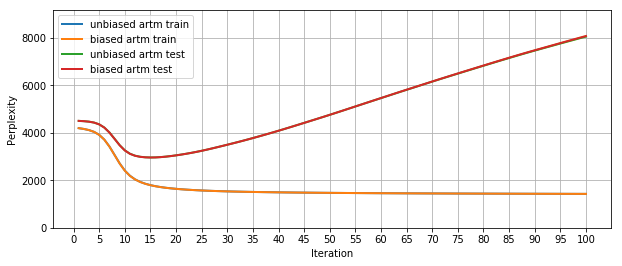

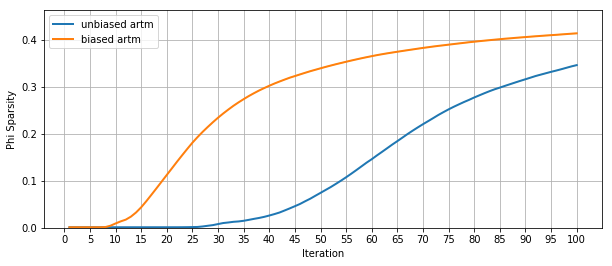

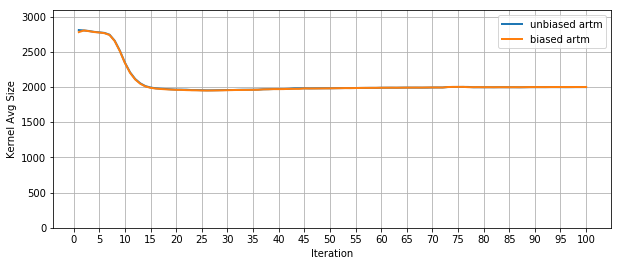

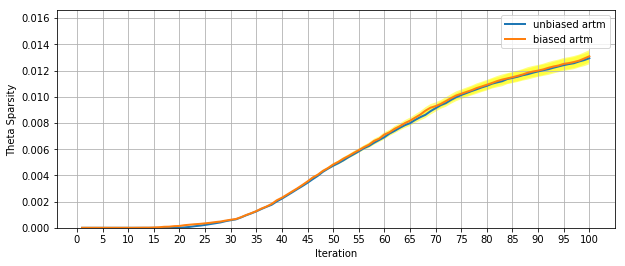

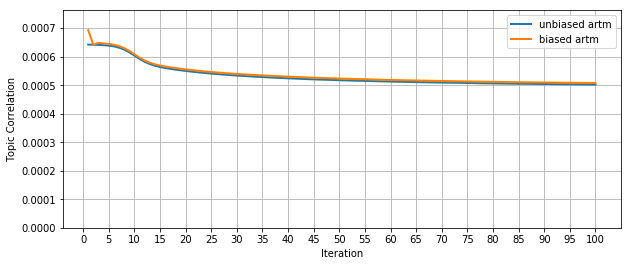

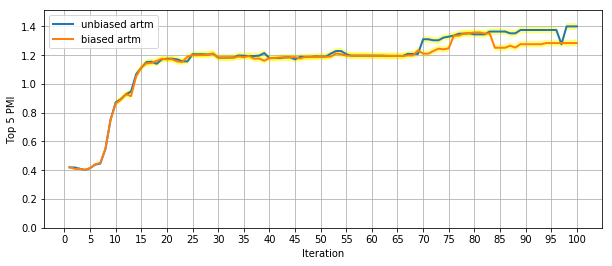

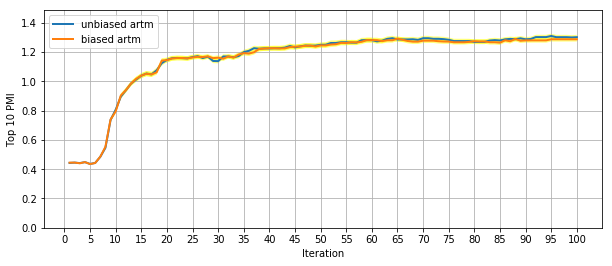

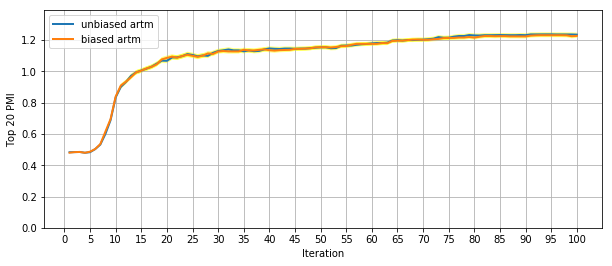

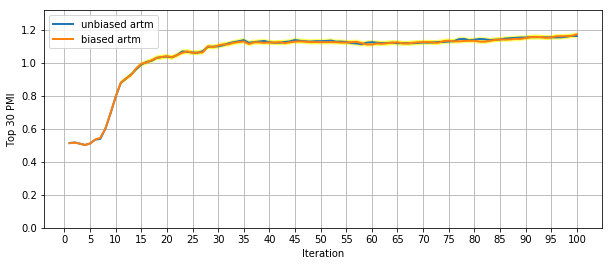

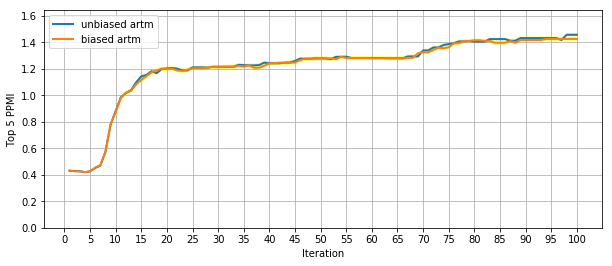

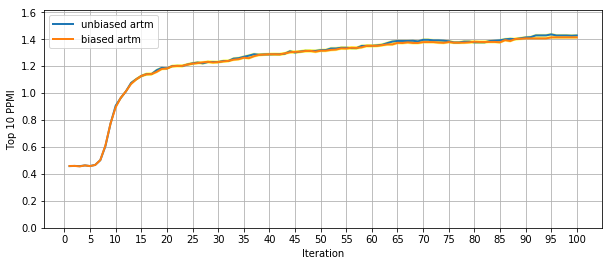

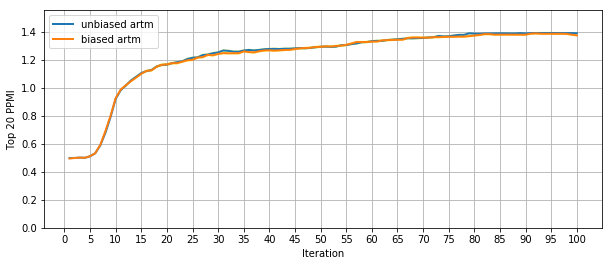

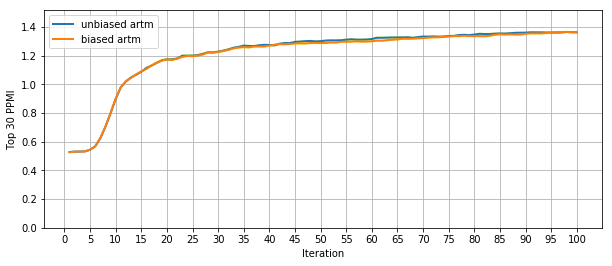

In [15]:
plot(30, 10000000)

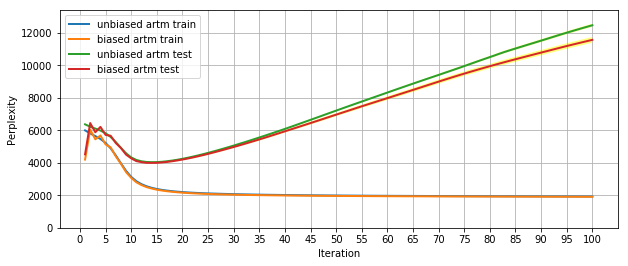

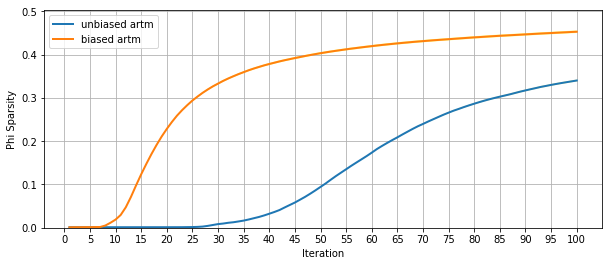

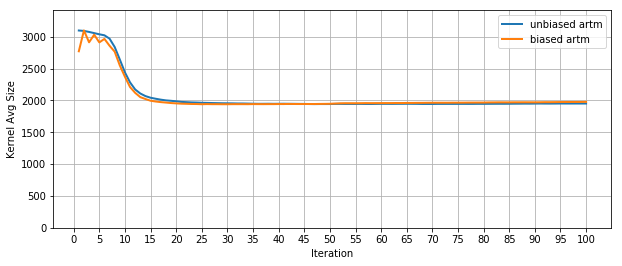

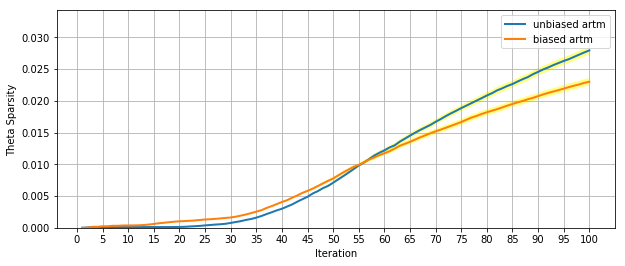

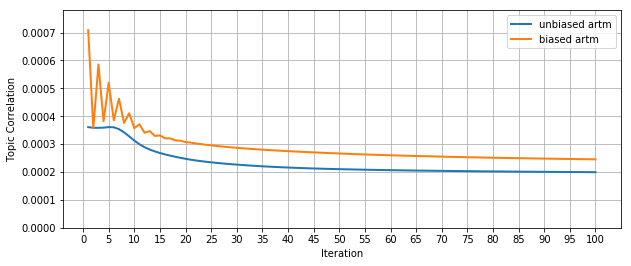

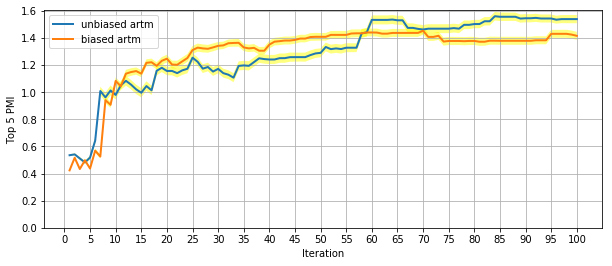

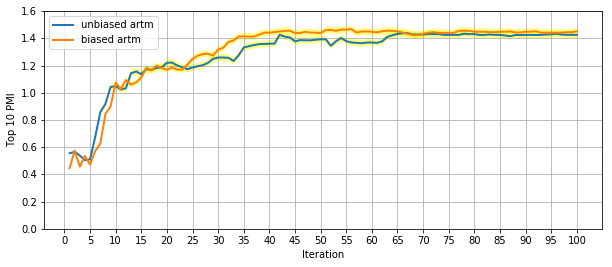

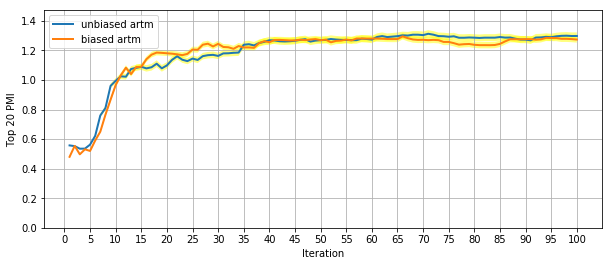

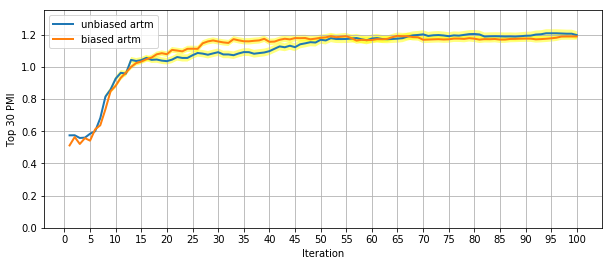

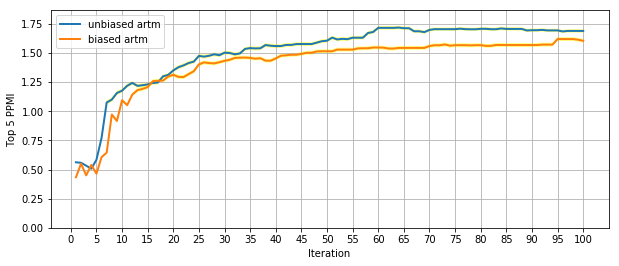

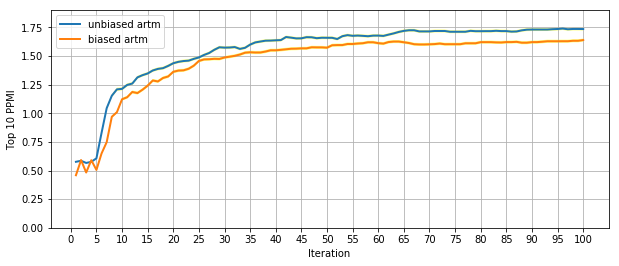

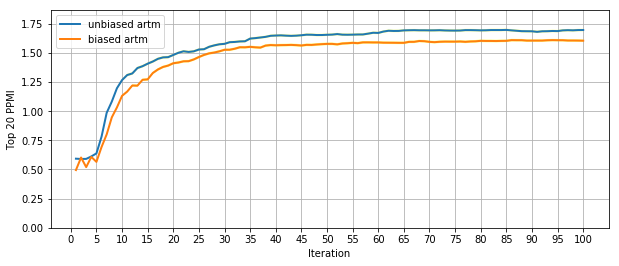

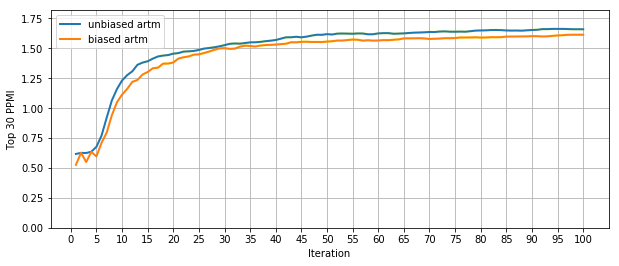

In [16]:
plot(30, 100000000)

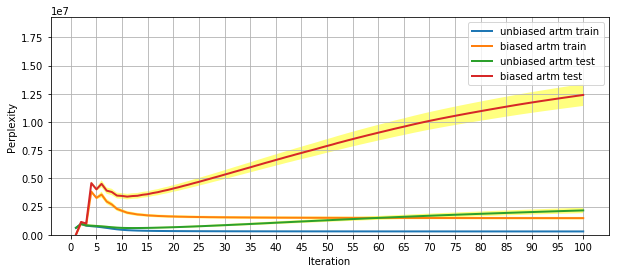

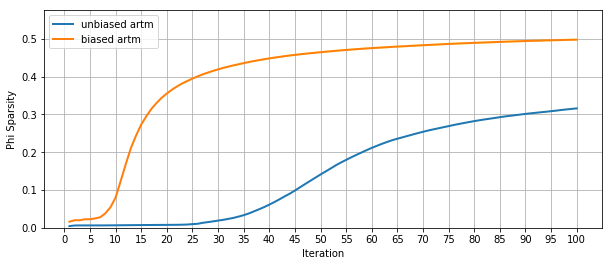

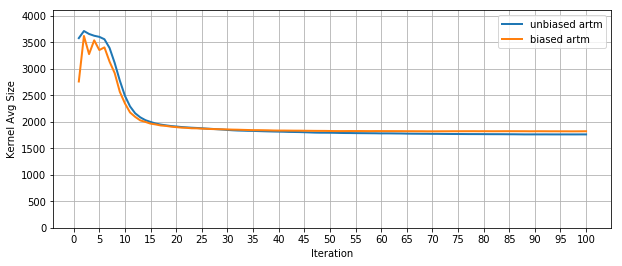

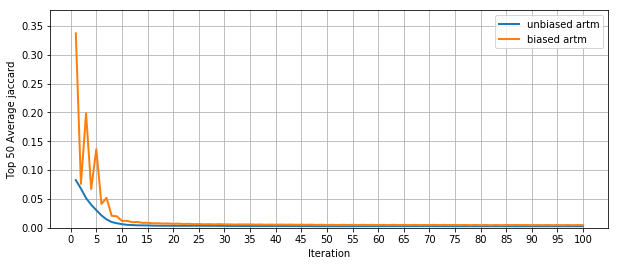

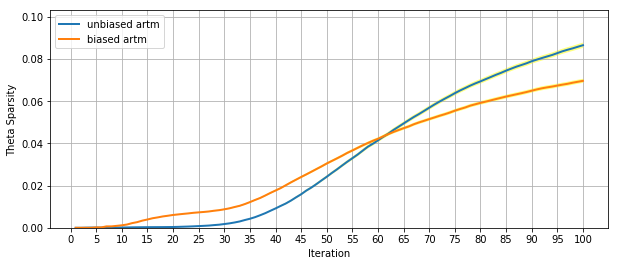

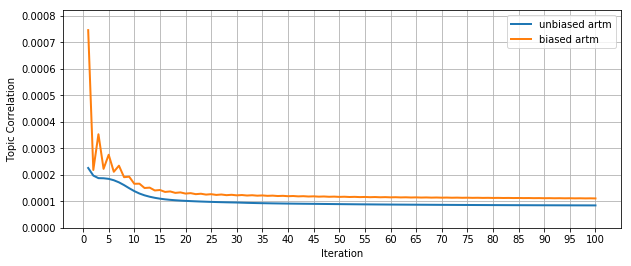

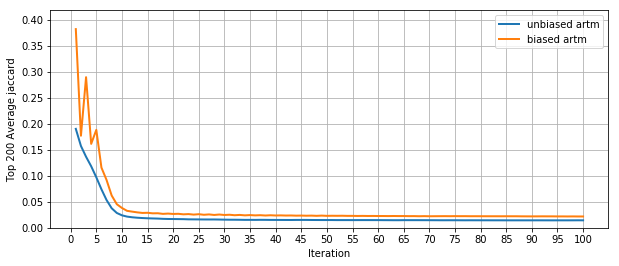

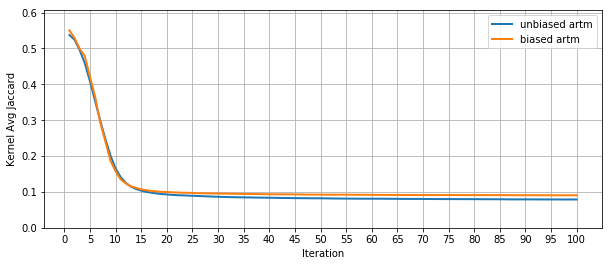

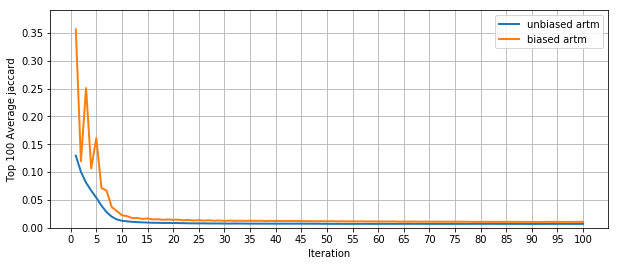

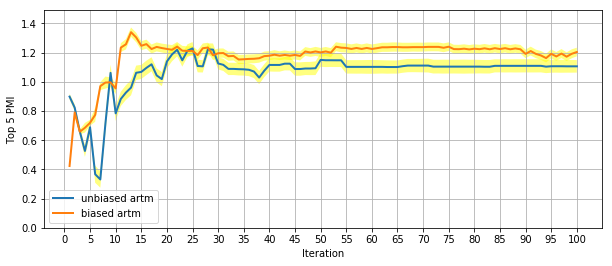

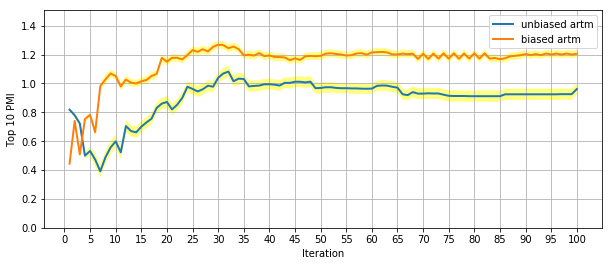

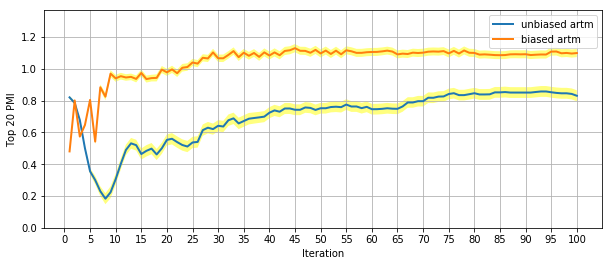

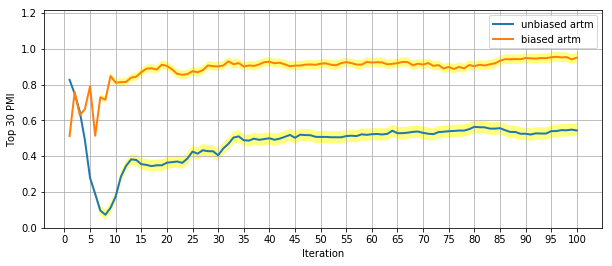

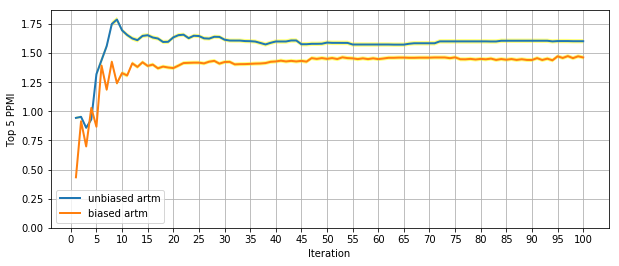

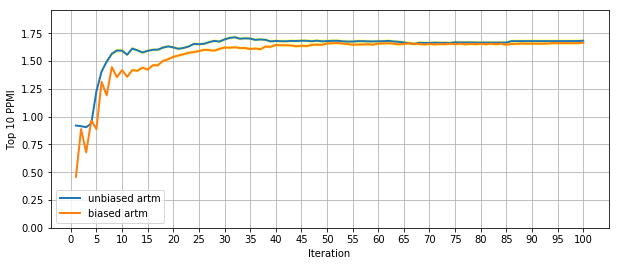

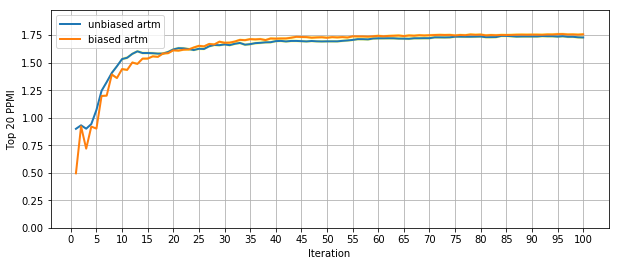

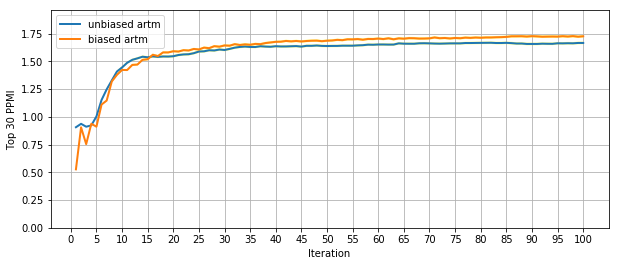

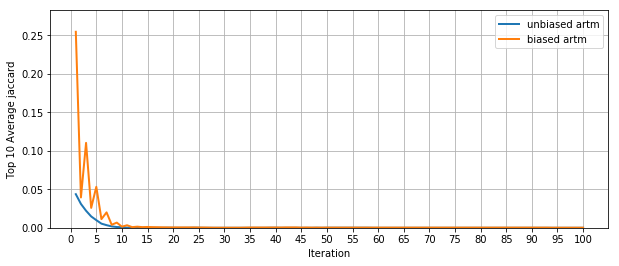

In [17]:
plot(30, 300000000)

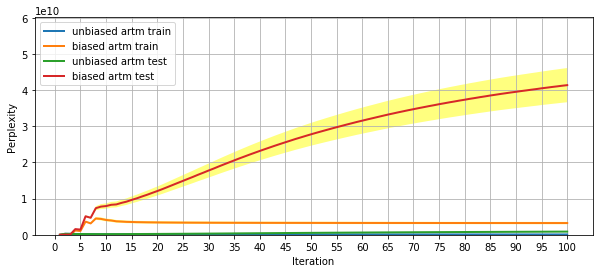

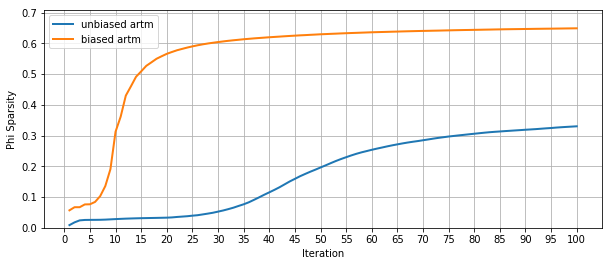

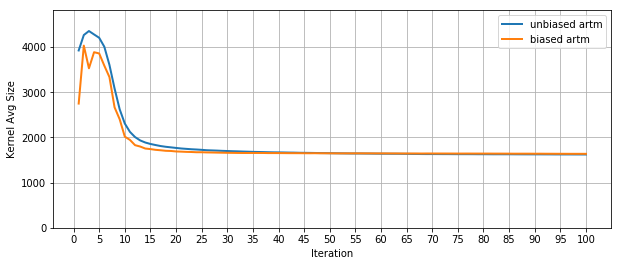

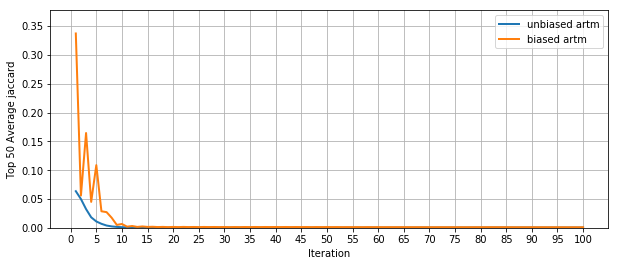

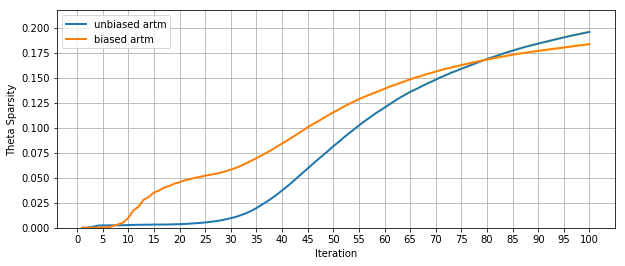

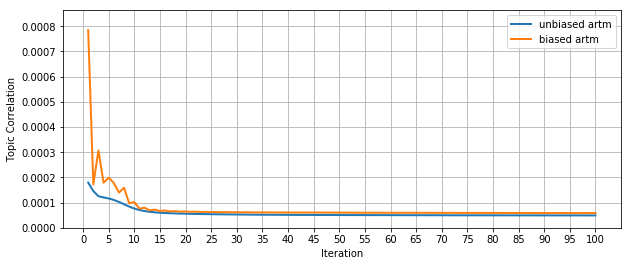

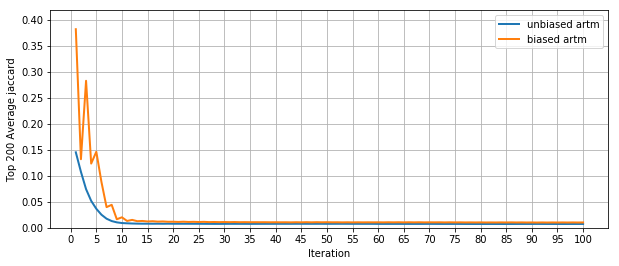

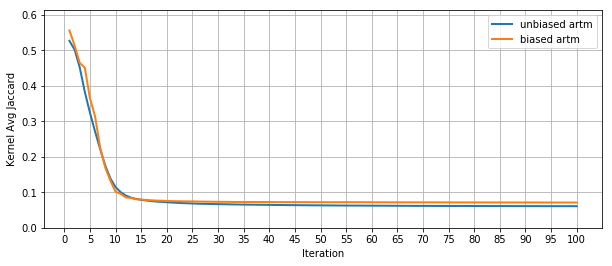

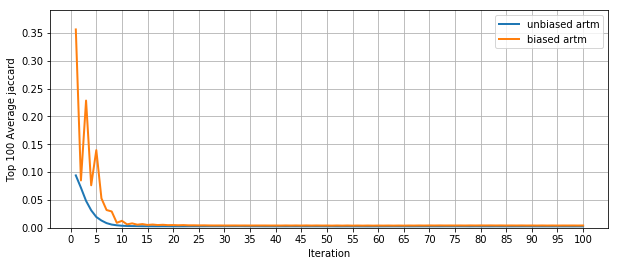

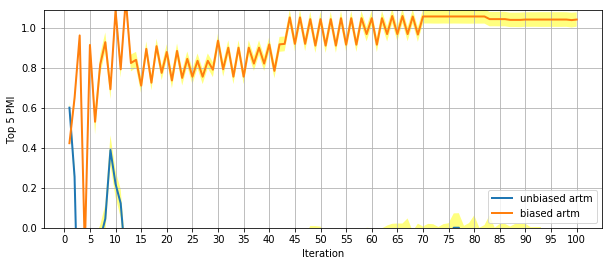

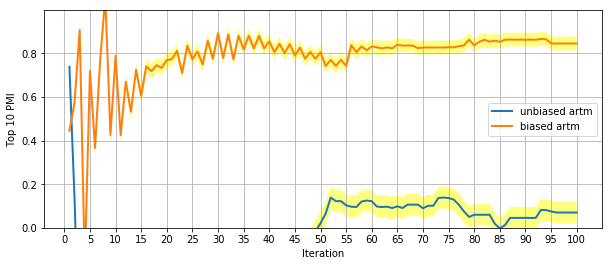

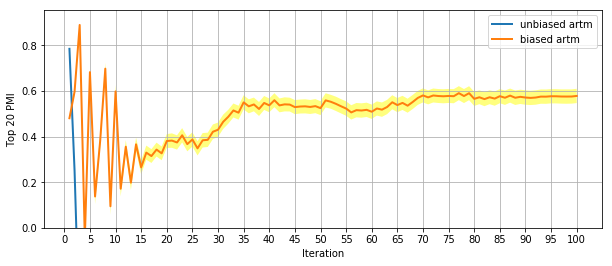

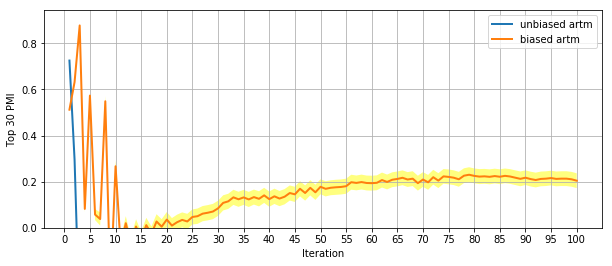

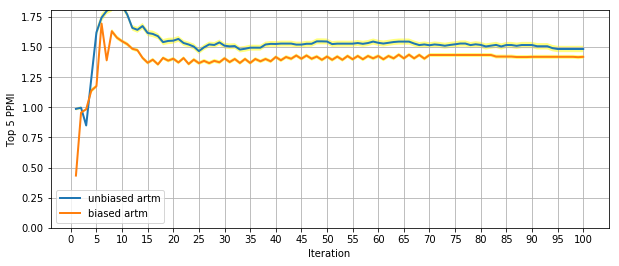

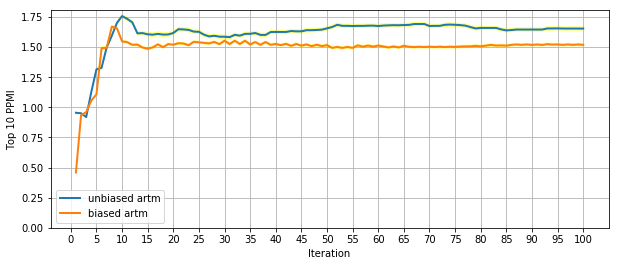

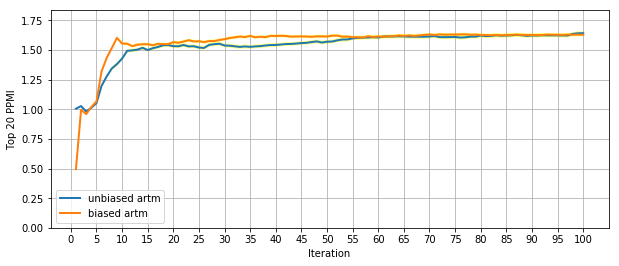

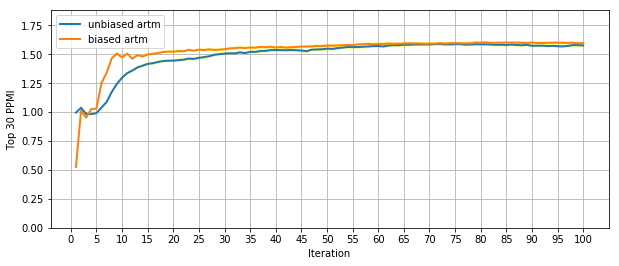

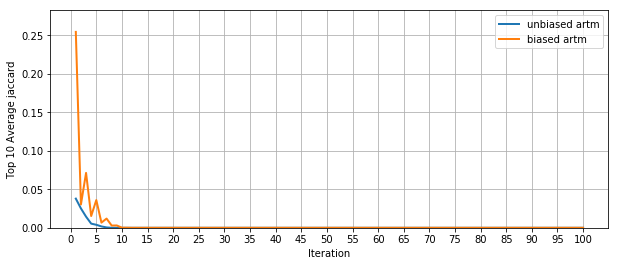

In [18]:
plot(30, 500000000)

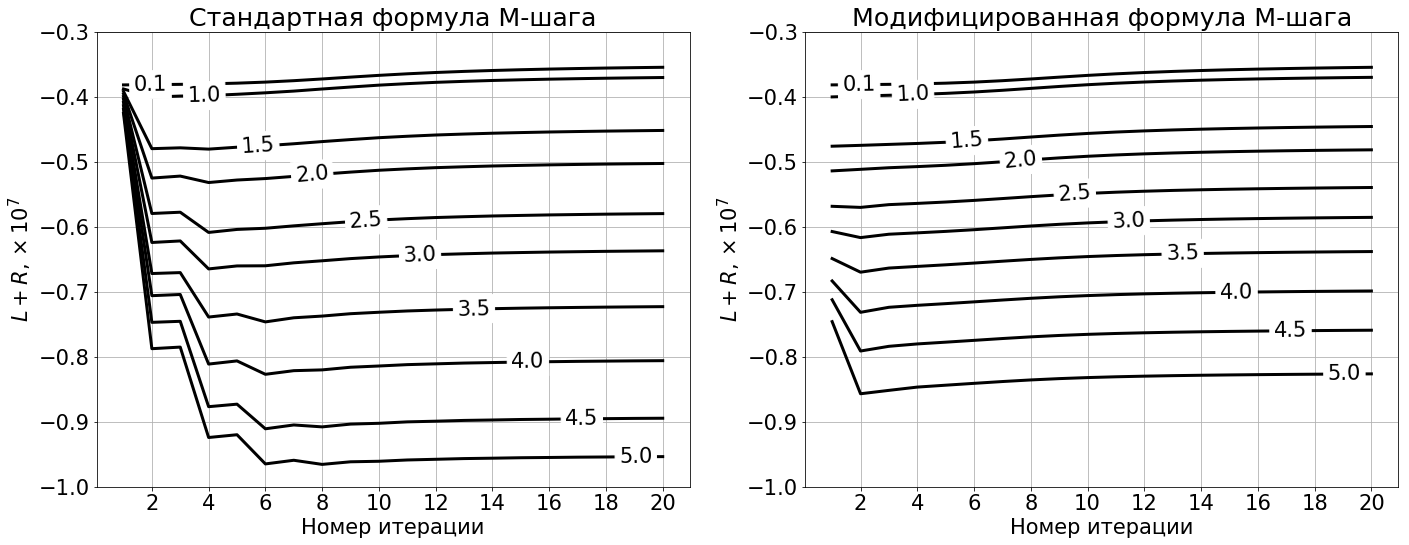

In [164]:
font = {
    'family' : 'sans-serif',
    'size'   : 21,
    'sans-serif': ['Roboto']
}
plt.rc('font', **font)

fig = plt.figure(figsize=(20, 8))
x_ticks = np.arange(0, 21, 2)
taus = map(int, [1e7, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8])

ax = fig.add_subplot(121)
ax.set_xticks(x_ticks)
old_values = []
for tau in taus:
    with open('20news_experiment/20news_10t_{}_True.pkl'.format(tau), 'r') as f:
        data = pickle.load(f)
    L = (- np.log(data['train_perplexity']) * WORDS_NUMBER).mean(axis=0)
    R = (- np.array(data['topic_correlation']) * tau).mean(axis=0)
    old_values.append((1 * L + 1 * R)[20])
    plt.plot(range(1, 21), (L + R)[:20] / 1e7, 'k-', linewidth=3, label = tau / 1e8)
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlabel(u'Номер итерации')
plt.ylabel('$L + R, \\times 10^7$')
plt.ylim(-1, -0.3)
plt.title(u'Стандартная формула M-шага')
plt.grid()

    
ax = fig.add_subplot(122)
ax.set_xticks(x_ticks)
new_values = []
for tau in taus:
    with open('20news_experiment/20news_10t_{}_False.pkl'.format(tau), 'r') as f:
        data = pickle.load(f)
    L = (- np.log(data['train_perplexity']) * WORDS_NUMBER).mean(axis=0)
    R = (- np.array(data['topic_correlation']) * tau).mean(axis=0)
    new_values.append((1 * L + 1 * R)[20])
    plt.plot(range(1, 21), (L + R)[:20] / 1e7, 'k-', linewidth=3, label = tau / 1e8)
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlabel(u'Номер итерации')
plt.ylabel('$L + R, \\times 10^7$')
plt.ylim(-1, -0.3)
plt.title(u'Модифицированная формула M-шага')
plt.grid()

plt.tight_layout()

plt.savefig('./paper.eps', format="eps")
plt.show()

In [151]:
from labellines import labelLine, labelLines

In [169]:
import requests

requests.post(
    'https://api.hr-sys.team/hiring-candidates/ml-score/execute/e825f024e88d44249da71bc0d156bb94', 
    json={"model_name": "DRIVERS_CANDIDATES_CALL_DECISION",
          "lead_id": "12031239",

          "fields": [{
              "name": "phone",
              "value": '+79254230410'
          }]}
).json()

{u'decision': True,
 u'fields': [{u'name': u'decision', u'value': True},
  {u'name': u'ml_decision', u'value': u'ml_decision_true'},
  {u'name': u'no_need_call', u'value': False}],
 u'lead_id': u'12031239'}

In [251]:
def plot(metric_name, metric_label, filename, log=False):
    font = {
        'family' : 'sans-serif',
        'size'   : 21,
        'sans-serif': ['Times New Roman']
    }
    plt.rc('font', **font)

    fig = plt.figure(figsize=(20, 9))
    
    x_ticks = np.arange(0, 501, 50)
    #taus = map(int, [1e7, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8])
    taus = map(int, [1e7, 1e8, 5e8])

    ax = fig.add_subplot(121)
    ax.set_xticks(x_ticks)
    for tau in taus:
        with open('20news_experiment/20news_10t_{}_True.pkl'.format(tau), 'r') as f:
            data = pickle.load(f)
        values = np.mean(data[metric_name], axis=0)
        if log:
            values = np.log(values)
        plt.plot(range(len(values)), values, linewidth=3)
    plt.xlabel(u'Номер итерации')
    plt.ylabel(metric_label)
    plt.title(u'|T| = 10')
    plt.grid()


    ax = fig.add_subplot(122)
    ax.set_xticks(x_ticks)
    for tau in taus:
        with open('20news_experiment/20news_30t_{}_True.pkl'.format(tau), 'r') as f:
            data = pickle.load(f)
        values = np.mean(data[metric_name], axis=0)
        if log:
            values = np.log(values)
        plt.plot(range(len(values)), values, linewidth=3)
    plt.xlabel(u'Номер итерации')
    plt.ylabel(metric_label)
    plt.title(u'|T| = 30')
    plt.grid()


    plt.tight_layout()
    plt.subplots_adjust(bottom=.2)
    plt.figlegend(
        labels=map(lambda x: '$\\tau = {}$'.format(format_degree(x)), taus), 
        loc='lower center', 
        ncol=len(taus)
    )

    plt.savefig(filename, format="eps")
    plt.show()

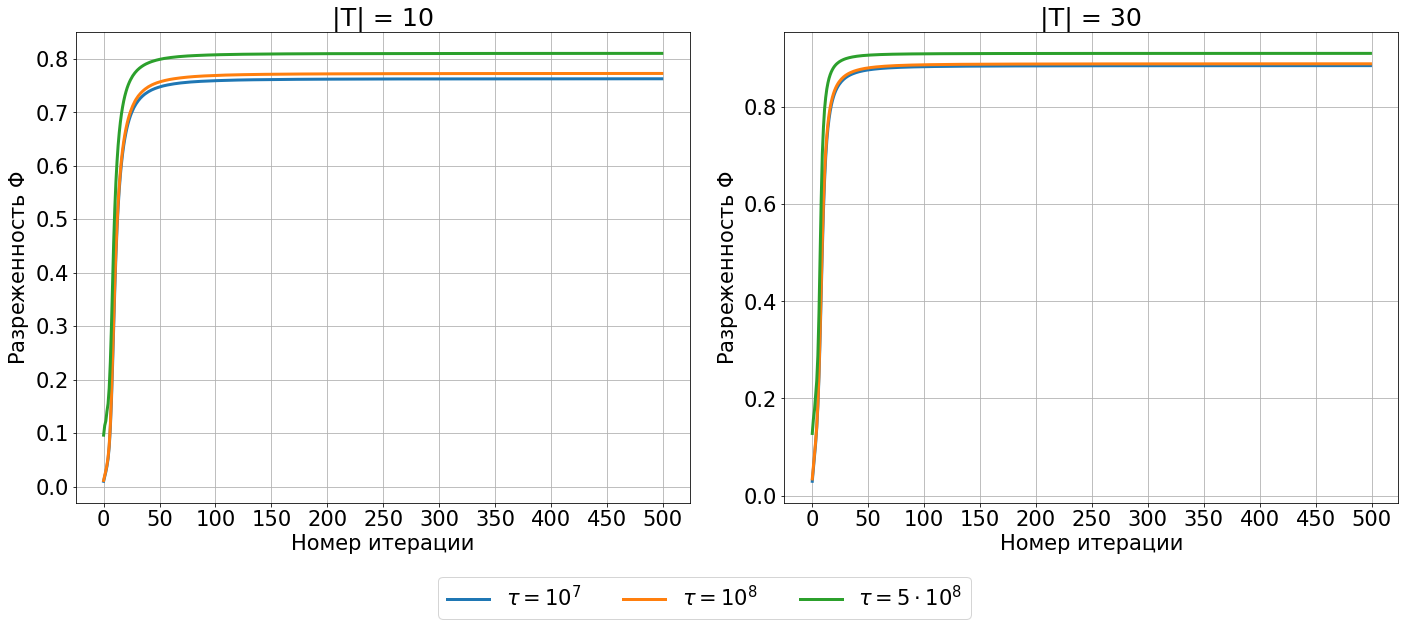

In [252]:
plot('phi_sparsity', u'Разреженность $\Phi$', 'phi_sparsity.eps')

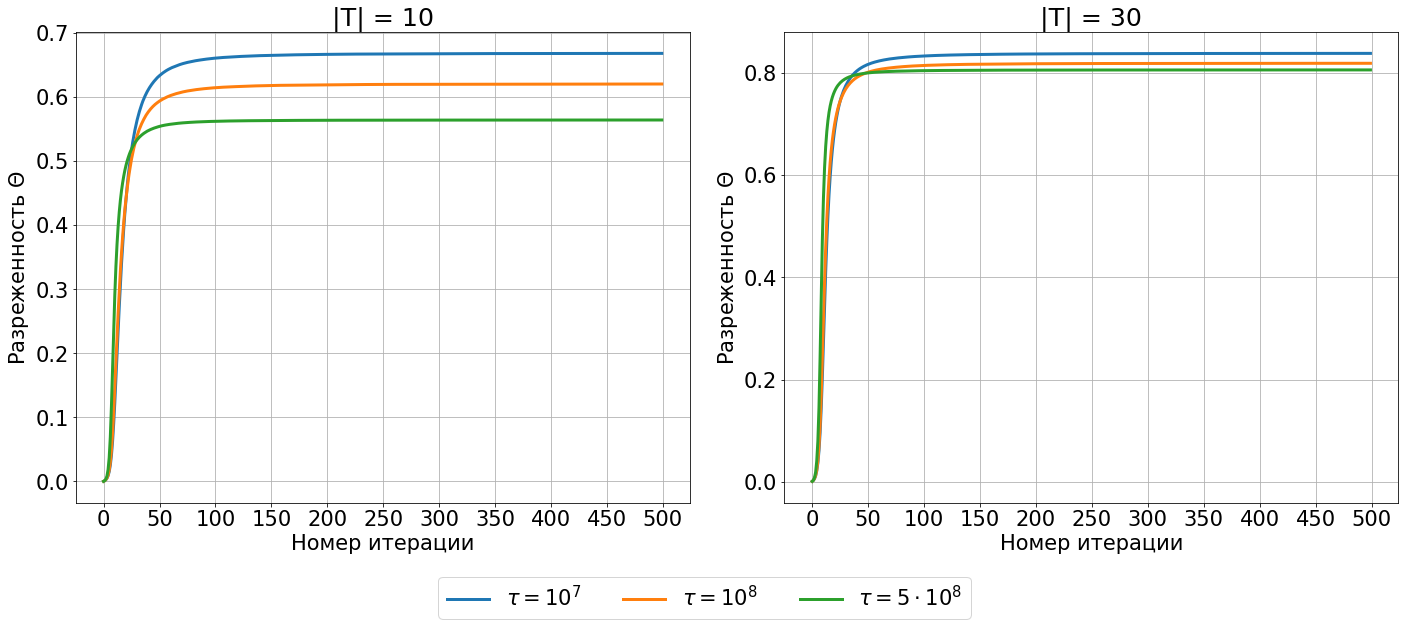

In [253]:
plot('theta_sparsity', u'Разреженность $\Theta$', 'theta_sparsity.eps')

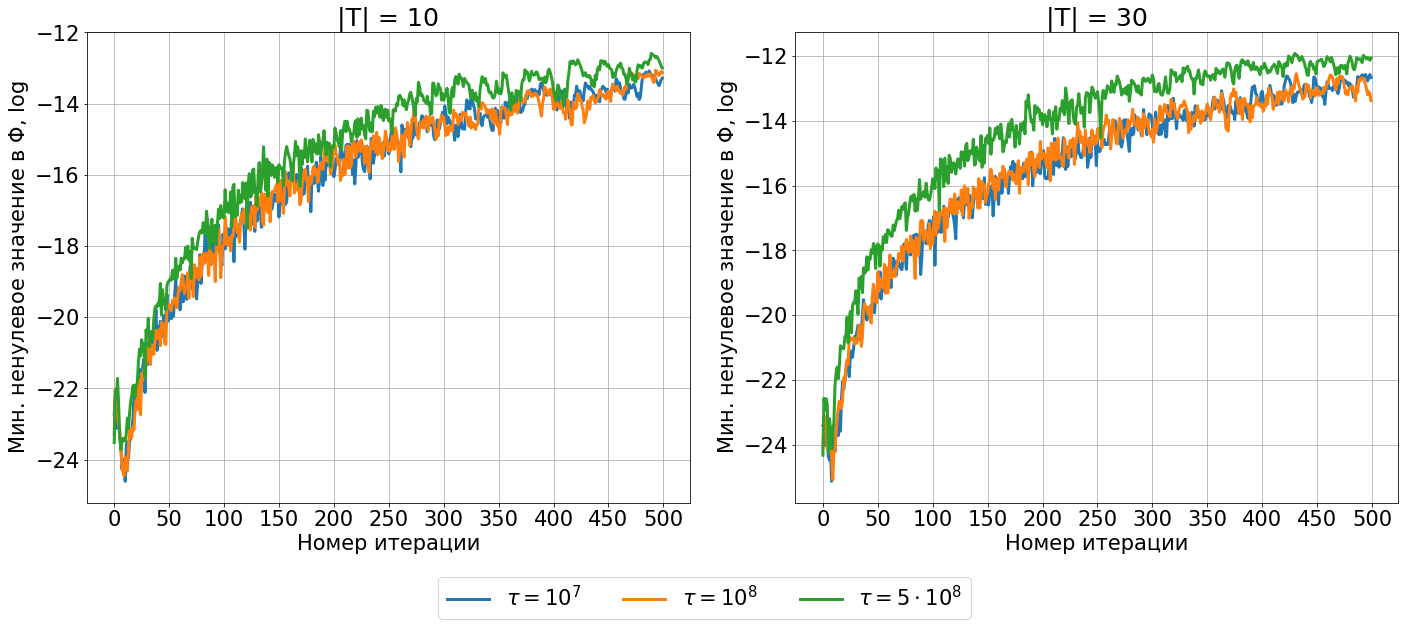

In [254]:
plot('min_nonzero_phi', u'Мин. ненулевое значение в $\Phi$, $\log$', 'min_nonzero_phi.eps', log=True)

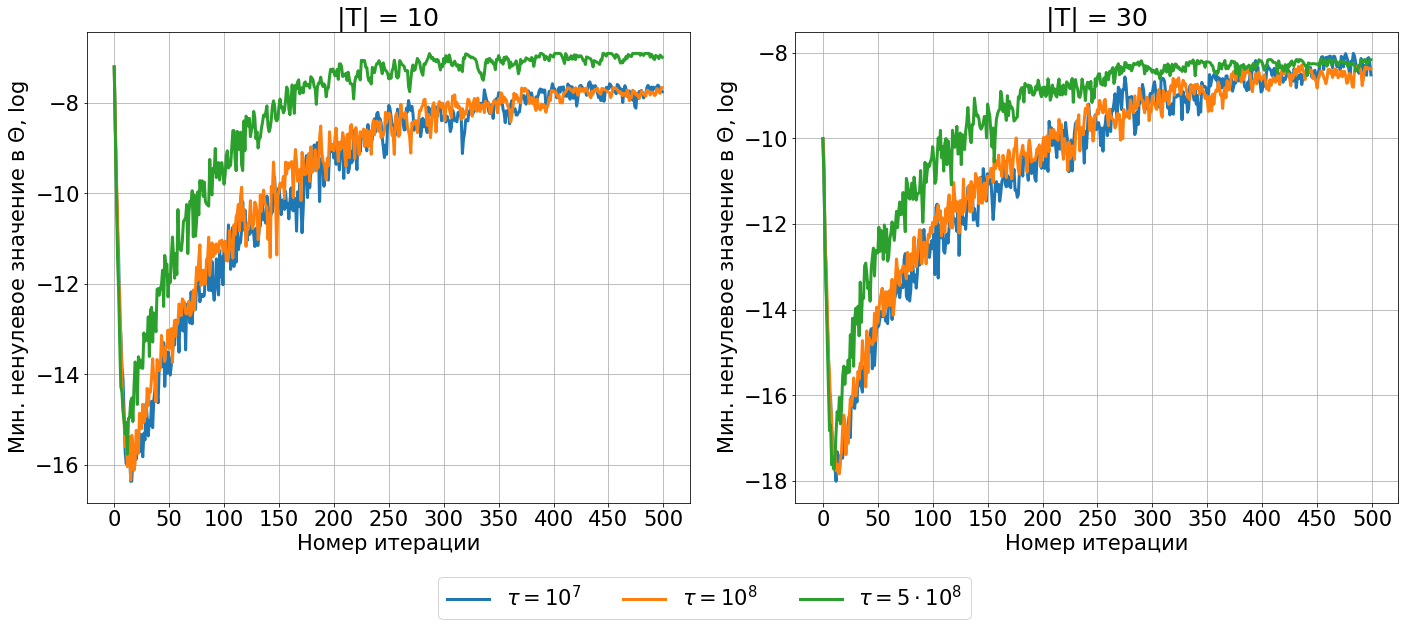

In [255]:
plot('min_nonzero_theta', u'Мин. ненулевое значение в $\Theta$, $\log$', 'min_nonzero_theta.eps', log=True)

In [268]:
!touch a.txt

In [ ]:
import re

In [274]:
items = []
with open('a.txt', 'r') as f:
    item = []
    for line in f:
        if line == '\n' and item:
            text = ''.join(item)
            items.append(text.strip())
            item = []
        else:
            item.append(line)

In [276]:
print '\n\n'.join(sorted(items))

\bibitem[Alekseev, 2018]{intracoh}
{\it Alekseev~Vasiliy, Bulatov~Victor, Vorontsov~Konstantin}. Intra-text
  coherence as a measure of topic models' interpretability~// Computational
  Linguistics and Intellectual Technologies: Papers from the Annual
  International Conference Dialogue.~--- 2018.~--- P.~1--13.

\bibitem[Blei, 2003]{blei2003latent}
{\it Blei~David~M, Ng~Andrew~Y, Jordan~Michael~I}. Latent dirichlet
  allocation~// 
Journal of machine Learning research.~--- 2003.~--- Vol.~3, no. Jan.~--- P.~993--1022.

\bibitem[Blei, 2010]{Blei2010}
{\it Blei~David, Carin~Lawrence, Dunson~David}. 
  Probabilistic Topic Models~// {\it {IEEE} Signal Processing Magazine}.~--- 2010..

\bibitem[Boyd, 2009]{NIPS2008_3398}
{\it Boyd-graber~Jordan~L., Blei~David~M.} Syntactic Topic Models~//
  Advances in Neural Information Processing Systems 21~/ Ed.\ by\ D.~Koller,
  D.~Schuurmans, Y.~Bengio, L.~Bottou.~--- Curran Associates, Inc., 2009.~--- P.~185--192.

\bibitem[Boyd, 2017]{fntir2017applica